# **Heart Disease Prediction - Group 3**
---




Group Members:

* Deniz Muratlı
* Elifnur Öztürk
* Boran Akın
* Nazlı Bıyıklı

# **Introduction**

The purpose of this project is to reveal the relationships of different attributes with heart disease using data obtained from medical cases. Three data sets were used in the study: two were taken from separate sources on Kaggle and are supposedly provided by various hospitals in the US, and the other was taken from CDC, generated by a survey conducted by the organisation.

The relationships betweeen different combinations of variables were visualised, hypotheses were put forward based on the initial observations of the group members, and relevant statistical tests (t-test, z-test, and Chi-Square Test) were performed, confirming/rejecting the hypotheses. Lastly, machine learning models were constructed to predict heart disease outcomes for new profiles.

Warning: Graphs generated by the code run by Colab often appear distorted. Running on them VS Code is suggested if it is needed to examine them individually. Undistorted graphs are also provided in a Drive folder linked under "Exploratory Data Analysis" - however, they are from a recent but not up-to-date run.

### Utilised Datasets

Data sets that were used to build the main data frame (1221 rows):
* Heart Disease (Kaggle; 5 kB): https://www.kaggle.com/datasets/meetnagadia/heart-disease
  * This data set contains data for the following attributes:
    * Age (in years)
    * Sex
    * Chest pain type (typical angina, atypical angina, non-anginal pain, asymptomatic)
    * Resting blood pressure (in mmHg, upon admission to the hospital)
    * Serum cholesterol (in mg/dL)
    * Fasting blood sugar (> 120 mg/dL (likely to be diabetic), <= 120 mg/dL (not likely to be diabetic))
    * Resting electrocardiogram results (normal, ST-T wave abnormality, left ventricular hypertrophy)
    * Maximum heart rate during strenuous exercise (in beats per minute)
    * Exercise induced angina (yes, no)
    * Oldpeak
    * Slope (upsloping, flat, downsloping)
    * Number of major vessels (0-3) coloured by fluoroscopy
    * Thallium absorption by the heart (normal, fixed defect, reversible defect)
    * Heart disease (yes, no)
* Heart Failure Prediction Dataset (Kaggle; 9 kB): https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
  * This data set contains data for the same attributes as Heart Disease (the previous data set), except thallium absorption and the number of major vessels coloured by fluoroscopy.

Additional data set that was used to build the complementary data frame (319,795 rows):
* Personal Key Indicators of Heart Disease (CDC, but clean version on Kaggle; 3 MB): https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
  * This data set contains data for the following attributes:
    * Physical health (in # of days with good physical health)
    * Mental health (in # of days with good mental health)
    * Physical activity (physically active, not physically active)
    * Asthma (yes, no)
    * Race (Native American, black, Asian, Caucasian etc.)
    * Age category (18-24, 25-29, 30-34, 35-39 etc.)
    * BMI
    * Sleep time (in hours)
    * Walking difficulties (yes, no)
    * Kidney disease (yes, no)
    * Skin cancer (yes,no)
    * Smoking (yes, no)
    * Alcohol drinking (yes, no)
    * Stroke (yes, no)
    * Diabetes (yes, no)
    * General health (poor, fair, good, very good, excellent)
    * Heart disease (yes, no)
  
Spatial data wasn't used due to the corrupt nature of the only available spatial heart disease data set.

# **Exploratory Data Analysis**

Before starting the analysis, the data had to be converted and fitted to a suitable container type on Python, followed by the treatment of outliers, missing values, and formatting. The DataFrame structure provided by Pandas was used, since it enables convenient manipulation of data. 

Visuals of the data were generated using Seaborn and matplotlib.pyplot. A full list of the imported libraries can be seen below.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data Preparation

In [ ]:
continuousAttributes=["Age", "RestBP", "Chol", "MaxHR", "Oldpeak", "BMI", "Physical Health", "Mental Health", "Sleep Time"]
categoricalAttributes=["AHD", "Sex", "ChestPain", "Fbs", "RestECG", "ExAng", "Slope", "Ca", "Thal", "Smoking", "Alcohol Drinking", "Stroke", "Walking Difficulties", "Age Category", "Race", "Diabetes", "Physical Activity", "General Health", "Asthma", "Kidney Disease", "Skin Cancer"]

continuousAttributeUnitMap={"Age": "", "RestBP": " (mmHg)", "Chol": " (mg/dL)", "MaxHR": " (# of beats per minute)", "Oldpeak": " (mm)", "BMI": "", "Physical Health": " (# of days with bad physical health)", "Mental Health": " (# of days with bad mental health)", "Sleep Time": " (hours)"}

def dataArranger(fileName):
    if fileName=="heart_disease.csv.txt":
        #INITIAL PROCESSING
        df=pd.read_csv(fileName)
        df["AHD"].replace(to_replace=["No", "Yes"], value=["Healthy", "Sick"], inplace=True)
        df["Sex"].replace(to_replace=[0, 1], value=["Female", "Male"], inplace=True)
        df["Fbs"].replace(to_replace=[0, 1], value=["<= 120 mg/dL", "> 120 mg/dL"], inplace=True)
        df["RestECG"].replace(to_replace=[0, 1, 2], value=["Normal", "ST-T wave abnormality", "Left ventricular hypertrophy"], inplace=True)
        df["ExAng"].replace(to_replace=[0, 1], value=["No exercise induced angina", "Exercise induced angina"], inplace=True)
        df["Slope"].replace(to_replace=[1, 2, 3], value=["Upsloping", "Flat", "Downsloping"], inplace=True)
        df["ChestPain"].replace(to_replace=["asymptomatic", "typical", "nontypical", "nonanginal"], value=["Asymptomatic", "Typical angina", "Non-typical angina", "Non-anginal pain"], inplace=True)
        df["Thal"].replace(to_replace=["normal", "fixed", "reversable"], value=["Normal", "Fixed defect", "Reversable"], inplace=True)

        #MISSING VALUE TREATMENT
        df["Thal"].fillna(df["Thal"].mode()[0], inplace=True) #Applies mode imputation for missing values under Thal

        df["Ca"].fillna(df["Ca"].mode()[0], inplace=True) #Applies mode imputation for missing values under Ca
    elif fileName=="heart_2020_cleaned.csv":
        #INITIAL PROCESSING
        df=pd.read_csv(fileName)
        df.rename(columns={"HeartDisease": "AHD", "AlcoholDrinking": "Alcohol Drinking", "DiffWalking": "Walking Difficulties", "AgeCategory": "Age Category", "Diabetic": "Diabetes", "PhysicalActivity": "Physical Activity", "GenHealth": "General Health", "PhysicalHealth": "Physical Health", "MentalHealth": "Mental Health", "SleepTime": "Sleep Time", "KidneyDisease": "Kidney Disease", "SkinCancer": "Skin Cancer"}, inplace=True)
        df["AHD"].replace(to_replace=["No", "Yes"], value=["Healthy", "Sick"], inplace=True)
        df["Smoking"].replace(to_replace=["No", "Yes"], value=["Non-smoker", "Smoker"], inplace=True)
        df["Alcohol Drinking"].replace(to_replace=["No", "Yes"], value=["Non-drinker", "Drinker"], inplace=True)
        df["Stroke"].replace(to_replace=["No", "Yes"], value=["No stroke", "Had stroke"], inplace=True)
        df["Walking Difficulties"].replace(to_replace=["No", "Yes"], value=["No difficulty walking", "Has difficulty walking"], inplace=True)
        df["Diabetes"].replace(to_replace=["No", "Yes"], value=["Healthy", "Diabetic"], inplace=True)
        df["Physical Activity"].replace(to_replace=["No", "Yes"], value=["Not physically active", "Physically active"], inplace=True)
        df["Asthma"].replace(to_replace=["No", "Yes"], value=["Healthy", "Asthmatic"], inplace=True)
        df["Kidney Disease"].replace(to_replace=["No", "Yes"], value=["Healthy", "Has kidney disease(s)"], inplace=True)
        df["Skin Cancer"].replace(to_replace=["No", "Yes"], value=["Healthy", "Has skin cancer"], inplace=True)
        
        #No missing value to treat
    else:
        pass

    return df

def dfExtender(df, fileNames): #Enriches the treated main data set (in DataFrame form) using other data sets
    for fileName in fileNames:
        newDF=pd.read_csv(fileName)
        if fileName=="heart_failure.csv":
            #INITIAL STEPS (the purpose is to make it as similar as possible to the main data frame before concatenating them together)
            newDF.rename(columns={"ChestPainType": "ChestPain", "RestingBP": "RestBP", "Cholesterol": "Chol", "FastingBS": "Fbs", "RestingECG": "RestECG", "ExerciseAngina": "ExAng", "ST_Slope": "Slope", "ca": "Ca", "thal": "Thal", "HeartDisease": "AHD"}, inplace=True)
            newDF["AHD"].replace(to_replace=[0, 1], value=["Healthy", "Sick"], inplace=True)
            newDF["Sex"].replace(to_replace=["M", "F"], value=["Male", "Female"], inplace=True)
            newDF["Fbs"].replace(to_replace=[0, 1], value=["<= 120 mg/dL", "> 120 mg/dL"], inplace=True)
            newDF["RestECG"].replace(to_replace=["ST", "LVH"], value=["ST-T wave abnormality", "Left ventricular hypertrophy"], inplace=True)
            newDF["ExAng"].replace(to_replace=["N", "Y"], value=["No exercise induced angina", "Exercise induced angina"], inplace=True)
            newDF["Slope"].replace(to_replace=["Up", "Down"], value=["Upsloping", "Downsloping"], inplace=True)
            newDF["ChestPain"].replace(to_replace=["ASY", "TA", "ATA", "NAP"], value=["Asymptomatic", "Typical angina", "Non-typical angina", "Non-anginal pain"], inplace=True)
            newDF["Thal"]=str(np.nan)
            newDF["Ca"]=np.nan
        else:
            pass

        extendedDF=pd.concat([df, newDF], ignore_index=True)
        extendedDF.drop_duplicates(inplace=True) #Just in case
        
        if fileName=="heart_failure.csv":
            #OUTLIER TREATMENT
            extendedDF["Chol"].replace(to_replace=0, value=np.nan, inplace=True)
            extendedDF["Chol"].fillna(df["Chol"].mean(), inplace=True) #Applies mean imputation for the removed outliers under Chol - it disturbs normality a lot, but leaving them as np.nan also creates problems 

            extendedDF["RestBP"].replace(to_replace=0, value=np.nan, inplace=True)
            extendedDF["RestBP"].fillna(df["RestBP"].mean(), inplace=True) #Applies mean imputation for the removed outliers under RestBP
        else:
            pass

    return extendedDF

dfInitial=dataArranger("heart_disease.csv.txt")
df=dfExtender(dfInitial, ["heart_failure.csv"])
dfNew=dataArranger("heart_2020_cleaned.csv")

## Visualisation and Initial Analysis

Visualisation of the data was made possible by compartmentalising the tasks into generalised functions that relied on the classification of attributes as categorical or continuous. This generalised approach speeded up coding (a major problem in this group's previous work on the same project) and yielded functions that, with the right minor modifications, work the same way on any data frame. 

The choice of which plotting style to use was made as follows:
* Continuous attribute vs. continuous attribute (e.g. Age vs. RestBP) or Continuous attribute vs. continuous attribute vs. categorical attribute (e.g. Age vs. RestBP vs. Sex) -> Scatterplot
* Categorical attribute vs. categorical attribute (e.g. Sex vs. AHD) or Categorical attribute vs. categorical attribute vs. categorical attribute (e.g. Sex vs. ExAng vs. AHD) -> Bar plot
* Categorical attribute vs. continuous attribute (e.g. AHD vs. Age) -> Histogram or box plot

The plots were divided into different numbers of subplots wherever it was needed for clearer representations. Furthermore, the means of continuous distributions were marked with lines to give the team a better idea about the distribution around the mean in each case.

Outdated (but still useful) visuals: https://drive.google.com/drive/folders/1y_oCQzpcV7_5DAUtGw7K-evWMDweTuUS?usp=sharing

In [ ]:
def task1_1(df, attributes): #Completes the very first task: visualising each attribute against AHD
    for attribute in attributes:
        #Age/RestBP/Chol/MaxHR/Oldpeak vs. AHD
        if attribute in continuousAttributes: #Plots histograms for age/restBP/chol/maxHR/oldpeak vs. # of sick/healthy people
            plt.style.use("seaborn-darkgrid")
            fig, axs=plt.subplots(2)
            ax1=sns.histplot(data=df[df["AHD"]=="Sick"], x=attribute, ax=axs[0]) #Add "bins=len(df[attribute].unique())" for more detail.
            ax2=sns.histplot(data=df[df["AHD"]=="Healthy"], x=attribute, ax=axs[1]) #Add "bins=len(df[attribute].unique())" for more detail.
            axs[0].set_title(attribute+" vs. # of sick people")
            axs[1].set_title(attribute+" vs. # of healthy people")
            axs[0].set_xlabel(attribute+continuousAttributeUnitMap[attribute])
            axs[1].set_xlabel(attribute+continuousAttributeUnitMap[attribute])
            axs[0].set_ylabel("# of sick people")
            axs[1].set_ylabel("# of healthy people")
            axs[0].axvline(x=df[attribute].mean(), linewidth=2, color="red", label="mean", alpha=0.4)
            axs[1].axvline(x=df[attribute].mean(), linewidth=2, color="red", label="mean", alpha=0.4)
            plt.show()
        #Sex/ChestPain/Fbs/RestECG/ExAng/Slope/Ca/Thal vs. AHD
        else: #Plots bar plots for sex/chest pain/fbs/restECG/exAng/slope/thal vs. # of sick/healthy people
            plt.style.use("seaborn-darkgrid")
            ax=sns.countplot(data=df, x=attribute, hue="AHD", order=sorted(df[attribute].unique()), hue_order=sorted(df["AHD"].unique()))
            for p in ax.patches:
                ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.1))
            plt.title(attribute+" vs. # of people")
            plt.ylabel("# of people")
            plt.show()

def task1_2(df, attributeGroups): #Completes Task 1.2: visualising attribute groups of 3 attributes against AHD - each attribute group must include 2 continuous + 1 categorical variables
    for attributeGroup in attributeGroups: #Plots scatterplots for cont. attribute vs. cont. attribute - sexes are distinguished by colour
        continuousVars=[]
        categoricalVar=""
        for attribute in attributeGroup:
            if attribute in continuousAttributes:
                continuousVars.append(attribute)
            else:
                categoricalVar=attribute

        plt.style.use("seaborn-darkgrid")
        fig, axs=plt.subplots(2)
        ax1=sns.scatterplot(data=df[df["AHD"]=="Sick"], x=continuousVars[0], y=continuousVars[1], hue=categoricalVar, hue_order=sorted(df[categoricalVar].unique()), ax=axs[0])
        ax2=sns.scatterplot(data=df[df["AHD"]=="Healthy"], x=continuousVars[0], y=continuousVars[1], hue=categoricalVar, hue_order=sorted(df[categoricalVar].unique()), ax=axs[1])
        axs[0].set_title(continuousVars[0]+" vs. "+categoricalVar+" vs. "+continuousVars[1]+" (for sick people)")
        axs[1].set_title(continuousVars[0]+" vs. "+categoricalVar+" vs. "+continuousVars[1]+" (for healthy people)")
        axs[0].axvline(x=df[continuousVars[0]].mean(), linewidth=2, color="red", label="mean", alpha=0.4)
        axs[0].axhline(y=df[continuousVars[1]].mean(), linewidth=2, color="blue", label="mean", alpha=0.4)
        axs[1].axvline(x=df[continuousVars[0]].mean(), linewidth=2, color="red", label="mean", alpha=0.4)
        axs[1].axhline(y=df[continuousVars[1]].mean(), linewidth=2, color="blue", label="mean", alpha=0.4)
        plt.show()

def task1_34(df, attributes): #Completes Task 1.3 and 1.4: visualising the relationships between age and various other attributes for both sexes
    for attribute in attributes:
        if attribute in continuousAttributes: #Plots scatterplots for age vs. continuous attribute for both females and males 
            plt.style.use("seaborn-darkgrid")
            fig, axs=plt.subplots(2)
            ax1=sns.scatterplot(data=df[df["Sex"]=="Female"], x="Age", y=attribute, color="purple", ax=axs[0])
            ax2=sns.scatterplot(data=df[df["Sex"]=="Male"], x="Age", y=attribute, color="blue", ax=axs[1])
            axs[0].set_title(attribute+" vs. Age (for females)")
            axs[1].set_title(attribute+" vs. Age (for males)")
            axs[0].set_ylabel(attribute+continuousAttributeUnitMap[attribute])
            axs[1].set_ylabel(attribute+continuousAttributeUnitMap[attribute])
            axs[0].axvline(x=df["Age"].mean(), linewidth=2, color="red", label="mean", alpha=0.4)
            axs[0].axhline(y=df[attribute].mean(), linewidth=2, color="blue", label="mean", alpha=0.4)
            axs[1].axvline(x=df["Age"].mean(), linewidth=2, color="red", label="mean", alpha=0.4)
            axs[1].axhline(y=df[attribute].mean(), linewidth=2, color="blue", label="mean", alpha=0.4)
            plt.show()
        else: #Plots boxplots for age vs. categorical attribute for both females and males
            plt.style.use("seaborn-darkgrid")
            fig, axs=plt.subplots(1, 2, squeeze=False)
            ax1=sns.boxplot(data=df[df["Sex"]=="Female"], x=attribute, y="Age", ax=axs[0, 0], order=sorted(df[attribute].unique()))
            ax2=sns.boxplot(data=df[df["Sex"]=="Male"], x=attribute, y="Age", ax=axs[0, 1], order=sorted(df[attribute].unique()))
            axs[0, 0].set_title(attribute+" vs. Age (for females)")
            axs[0, 1].set_title(attribute+" vs. Age (for males)")
            plt.show()

def task1_5(df, attributes): #Completes Task 1.5: visualising each attribute except AHD against ChestPain
    for attribute in attributes:
        if attribute in continuousAttributes:
            plt.style.use("seaborn-darkgrid")
            ax=sns.boxplot(data=df, x="ChestPain", y=attribute, order=sorted(df["ChestPain"].unique()))
            plt.title("ChestPain vs. "+attribute)
            plt.ylabel(attribute+continuousAttributeUnitMap[attribute])
            plt.show()
        else:
            plt.style.use("seaborn-darkgrid")
            ax=sns.countplot(data=df, x="ChestPain", hue=attribute, order=sorted(df["ChestPain"].unique()), hue_order=sorted(df[attribute].unique()))
            for p in ax.patches:
                ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.1))
            plt.title("ChestPain vs. "+attribute)
            plt.ylabel("# of people")
            plt.show()

def task1_6(df, attributeGroups): #Completes Task 1.6: visualising attribute groups of 2 attributes against AHD to determine their relationships with the development of heart diseases
    for attributeGroup in attributeGroups:
        continuousVars=[]
        categoricalVars=[]
        for attribute in attributeGroup:
            if attribute in continuousAttributes:
                continuousVars.append(attribute)
            else:
                categoricalVars.append(attribute)
        if len(continuousVars)==2: #Plots scatterplots to visualise 2 continuous attributes against both AHD states
            plt.style.use("seaborn-darkgrid")
            fig, axs=plt.subplots(2)
            ax1=sns.scatterplot(data=df[df["AHD"]=="Sick"], x=continuousVars[0], y=continuousVars[1], ax=axs[0])
            ax2=sns.scatterplot(data=df[df["AHD"]=="Healthy"], x=continuousVars[0], y=continuousVars[1], ax=axs[1])
            axs[0].set_title(continuousVars[0]+" vs. "+continuousVars[1]+" (for sick people)")
            axs[1].set_title(continuousVars[0]+" vs. "+continuousVars[1]+" (for healthy people)")
            axs[0].set_xlabel(continuousVars[0]+continuousAttributeUnitMap[continuousVars[0]])
            axs[1].set_xlabel(continuousVars[0]+continuousAttributeUnitMap[continuousVars[0]])
            axs[0].set_ylabel(continuousVars[1]+continuousAttributeUnitMap[continuousVars[1]])
            axs[1].set_ylabel(continuousVars[1]+continuousAttributeUnitMap[continuousVars[1]])
            axs[0].axvline(x=df[continuousVars[0]].mean(), linewidth=2, color="red", label="mean", alpha=0.4)
            axs[0].axhline(y=df[continuousVars[1]].mean(), linewidth=2, color="blue", label="mean", alpha=0.4)
            axs[1].axvline(x=df[continuousVars[0]].mean(), linewidth=2, color="red", label="mean", alpha=0.4)
            axs[1].axhline(y=df[continuousVars[1]].mean(), linewidth=2, color="blue", label="mean", alpha=0.4)
            plt.show()
        elif len(categoricalVars)==2: #Plots bar plots to visualise 2 categorical attributes against both AHD states
            plt.style.use("seaborn-darkgrid")
            fig, axs=plt.subplots(1, 2, squeeze=False)
            ax1=sns.countplot(data=df[df["AHD"]=="Sick"], x=categoricalVars[0], hue=categoricalVars[1], order=sorted(df[categoricalVars[0]].unique()), hue_order=sorted(df[categoricalVars[1]].unique()), ax=axs[0, 0])
            for p in ax1.patches:
                ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.1))
            ax2=sns.countplot(data=df[df["AHD"]=="Healthy"], x=categoricalVars[0], hue=categoricalVars[1], order=sorted(df[categoricalVars[0]].unique()), hue_order=sorted(df[categoricalVars[1]].unique()), ax=axs[0, 1])
            for p in ax2.patches:
                ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.1))
            axs[0, 0].set_title(categoricalVars[0]+" and "+categoricalVars[1]+" vs. # of people (for sick people)")
            axs[0, 1].set_title(categoricalVars[0]+" and "+categoricalVars[1]+" vs. # of people (for healthy people)")
            axs[0, 0].set_ylabel("# of people")
            axs[0, 1].set_ylabel("# of people")
            plt.show()
        else: #Plots box plots to visualise 1 categorical + 1 continuous attribute against both AHD states
            plt.style.use("seaborn-darkgrid")
            fig, axs=plt.subplots(1, 2, squeeze=False)
            ax1=sns.boxplot(data=df[df["AHD"]=="Sick"], x=categoricalVars[0], y=continuousVars[0], order=sorted(df[categoricalVars[0]].unique()), ax=axs[0, 0])
            ax2=sns.boxplot(data=df[df["AHD"]=="Healthy"], x=categoricalVars[0], y=continuousVars[0], order=sorted(df[categoricalVars[0]].unique()), ax=axs[0, 1])
            axs[0, 0].set_title(categoricalVars[0]+" vs. "+continuousVars[0]+" (for sick people)")
            axs[0, 1].set_title(categoricalVars[0]+" vs. "+continuousVars[0]+" (for healthy people)")
            axs[0, 0].set_ylabel(continuousVars[0]+continuousAttributeUnitMap[continuousVars[0]])
            axs[0, 1].set_ylabel(continuousVars[0]+continuousAttributeUnitMap[continuousVars[0]])
            plt.show()

### 1.1 Visualising each attribute separately with respect to AHD

The initial observations of the group members based on the graphs generated were as follows for each attribute:
* Age: People with heart diseases tend to be older (with the biggest peak in the histogram around 60) than healthy people.
* Sex: Although it should be noted that the data used contains significantly more males than females, females tend to be affected by heart diseases less.
* ChestPain: People that are asymptomatic in regards to chest pain after an exercise test seem to be more likely to have heart diseases.
* RestBP: It is relatively hard to comment on these visuals, but people with heart diseases tend to have resting blood pressures that are rather varied around the mean, while the resting blood pressures of healthy people are concentrated in certain ranges (with the biggest peak around 130 mmHg).
* Chol: Even though the distribution of serum cholesterol levels look different in healthy and sick samples, they are actually very similar. The unusually high peak in the visual for sick people stems from the mean imputation performed on the data to treat missing values disguised as outliers (there were a considerable number of them). Therefore, it is hard to make a definitive comment now; hypothesis testing will show whether the difference is actually significant.
* Fbs: Diabetic people seem to be more likely to have heart diseases.
* RestECG: Left ventricular hypertrophy and ST-T wave abnormality seem to be linked to heart diseases.
* MaxHR: People with heart diseases tend to have more normally distributed maximum heart rates after the exercise test, with a higher concentration in lower ranges. In comparison, the distribution of maximum heart rates for healthy people have a left skew, being concentrated in higher ranges.
* ExAng: People who experience exercise induced angina seem significantly more likely to have heart diseases.
* Oldpeak: People with heart diseases tend to have higher oldpeak values compared to healthy people.
* Slope: Having a flat or downsloping slope appears to be increasing the risk of having heart diseases.
* Ca: Having a higher number of major vessels coloured by fluoroscopy seems to indicate a higher risk of having heart diseases.
* Thal: nan values should be ignored here; they are there because Thal was not a recorded attribute in the data set used to extend the main data frame. Otherwise, it seems like reversable defects are probably linked to heart diseases.

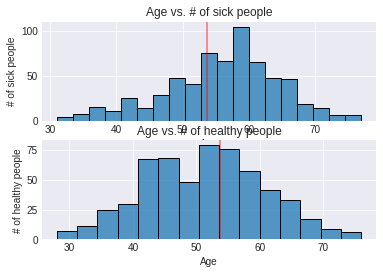

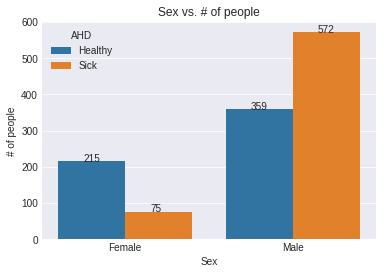

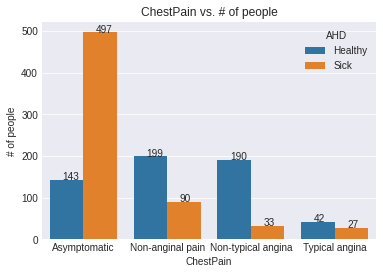

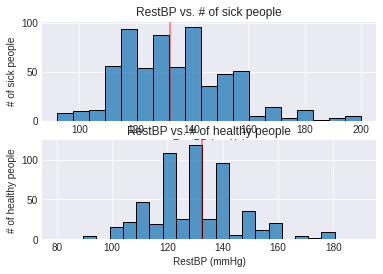

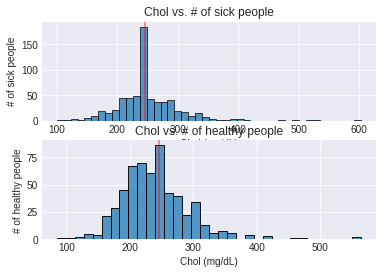

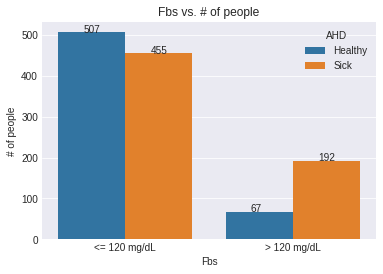

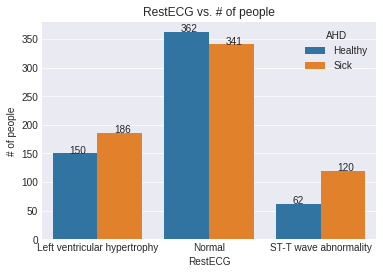

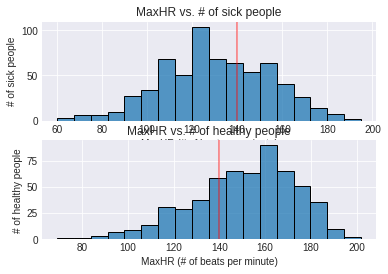

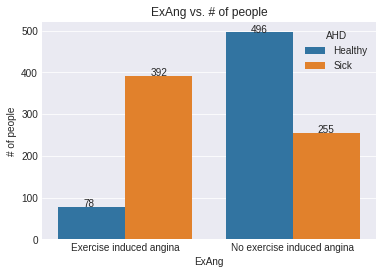

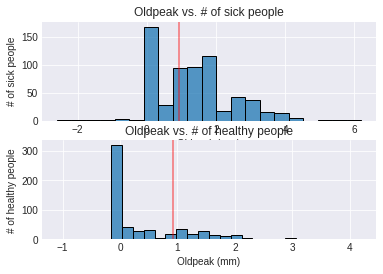

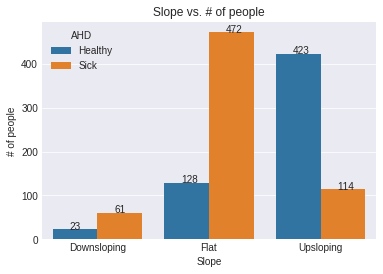

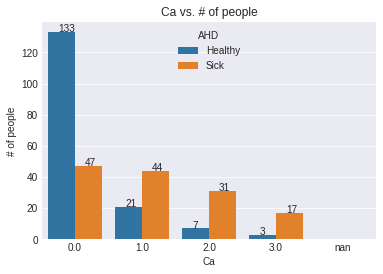

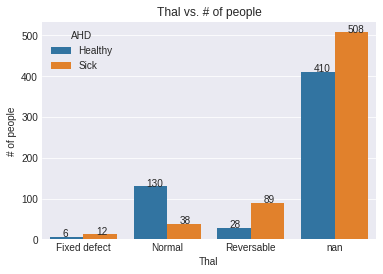

In [ ]:
task1_1(df, ["Age", "Sex", "ChestPain", "RestBP", "Chol", "Fbs", "RestECG", "MaxHR", "ExAng", "Oldpeak", "Slope", "Ca", "Thal"])

### 1.2 Visualising selected attribute groups with respect to AHD

In general, the visuals below provide new observations that support the group members' initial observations. Therefore, the visualisations of only some attribute groups against AHD were selected to report:
* Age vs. RestECG vs. MaxHR: 
  * There are more data points to the right (indicating older age) for sick people.
  * Data points are more concentrated around the mean of MaxHR for sick people, whereas more people seem to be above the same mean in the graph for healthy people.
  * There are too many categories of RestECG to distinguish.
* RestBP vs. ChestPain vs. MaxHR:
  * The bins at which healthy people's RestBP were concentrated can be easily distinguished in the graph for healthy people; data points for sick people are more spread along the x-axis (RestBP).
  * More data points are above the mean of MaxHR for healthy people compared to that for sick people (whose majority seem to be below the same mean).
  * The graph for sick people is significantly more blue in appearance than that for healthy people, supporting the observation that people who are asymptomatic in regards to ChestPain make up the majority of heart disease cases.
* Age vs. Slope vs. Chol:
  * Yellow and blue data points dominate the graph for sick people, suggesting the link between downsloping and flat slopes and heart diseases.
  * Data points in the graph for healthy people follow a more linear trend compared to that for sick people, which suggests that Chol and Age values are more evenly distributed in the healthy sample (Chol more so than Age).
* Age vs. Sex vs. MaxHR:
  * Again, healthy people have higher MaxHR values than sick people.
  * There is a higher concentration of old people in the graph for sick people.
  * Yellow data points (males) dominate the scatterplot for sick people.

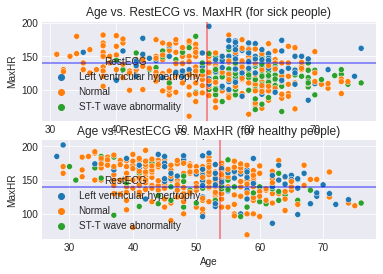

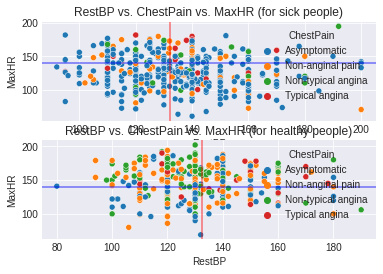

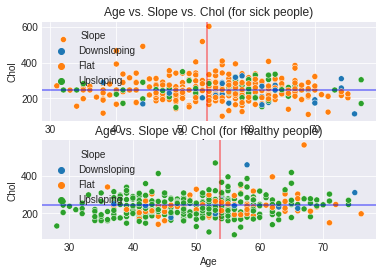

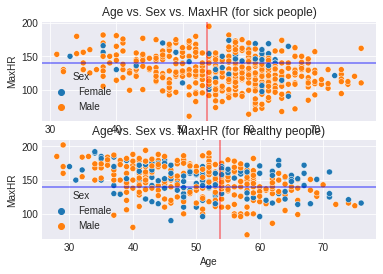

In [ ]:
task1_2(df, [["Age", "MaxHR", "RestECG"],
            ["RestBP", "MaxHR", "ChestPain"], 
            ["Age", "Chol", "Slope"], 
            ["Age", "MaxHR", "Sex"]])

### 1.3 & 1.4 Visualising each attribute with respect to Age and Sex

Because it is more relevant, only trends and what they indicate will be discussed here:
* Chol vs. Age vs. Sex: Both sexes have roughly the same linear relationship between Chol and Age, with probably differing strengths.
* Fbs vs. Age vs. Sex: Diabetic and non-diabetic people of both sexes have roughly the same distribution of age with slight variations (e.g. more spread male, diabetic people and less spread male, non-diabetic people).
* ExAng vs. Age vs. Sex: Again, a similar distribution of age for the same exercise angina categories of both sexes.
* ChestPain vs. Age vs. Sex: The distribution of age is pretty similar for all chest pain types of both sexes except typical angina. While females experiencing typical angina are older (above 55), males that do so can be of practically any range above 30.
* RestBP vs. Age vs. Sex: Similar linear relationship between RestBP and Age with different strenghts for both sexes.
* RestECG vs. Age vs. Sex: The distribution of age for RestECG types of both sexes are rather similar, with one exception. Males with ST-T wave abnormality have a narrower age range than females with the same RestECG - males are more likely to receive that RestECG result when they are older, whereas females can receive it at any age above 30.
* MaxHR vs. Age vs. Sex: Similar linear relationship between MaxHR and Age with different strengths for both sexes.
* Oldpeak vs. Age vs. Sex: Similar linear relationship between Oldpeak and Age with different strengths for both sexes.
* Slope vs. Age vs. Sex: The distribution of age is very similar for different slopes of both sexes, but a remarkable exception is for the downsloping slope. While males have downsloping slopes at ages above 40-42, females show the same tendency only above 55-56.
* Ca vs. Age vs. Sex: Likewise, ages are similarly distributed for different Ca values of both sexes. However, two exceptions exist: males with Ca = 3 have a dramatically wider age range compared to females, and females with Ca = 1 have a wider, but not as dramatic age range.
* Thal vs. Age vs. Sex: A similar comment to that in the previous graph can be made here (this time with Thal), but the weird line for fixed defect in the graph on the left can probably be attributed to the fact that there is only one female with such criteria - it is futile to comment on it.

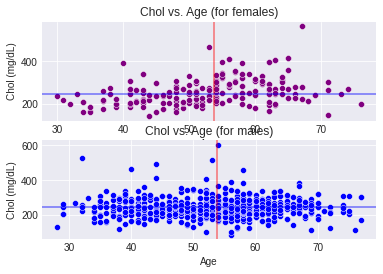

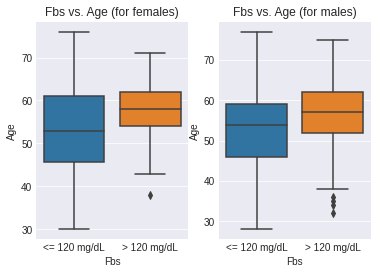

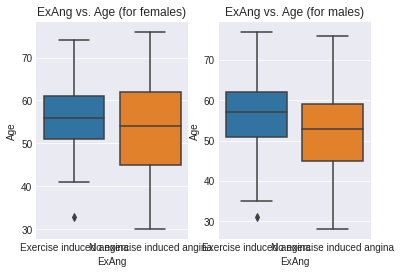

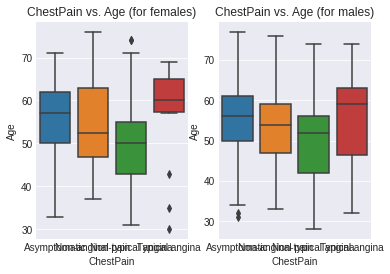

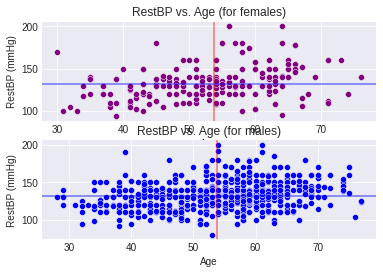

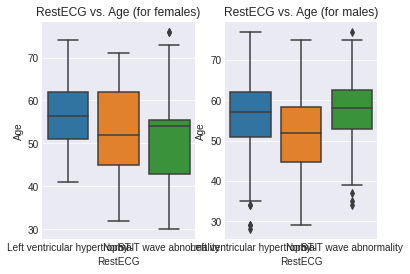

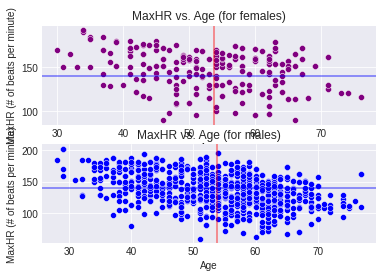

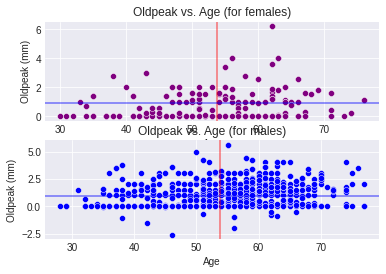

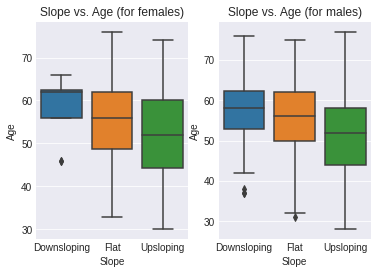

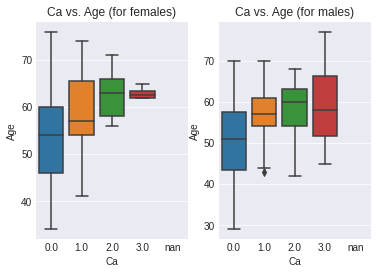

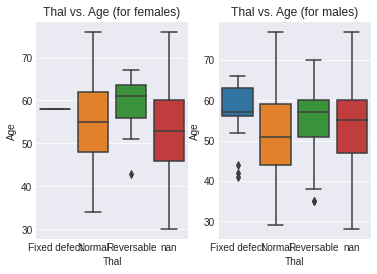

In [ ]:
task1_34(df, ["Chol", "Fbs", "ExAng", "ChestPain", "RestBP", "RestECG", "MaxHR", "Oldpeak", "Slope", "Ca", "Thal"])

### 1.5 Visualising each attribute except AHD with respect to ChestPain 

* ChestPain vs. Age: All chest pain types seem to have more or less the same age range.
* ChestPain vs. Sex: As discussed before, females are underrepresented in the sample, which is evident here as well. However, the commonality of different chest pain types can be ordered the same way for both sexes (e.g. most females and most males are both asymptomatic).
* ChestPain vs. RestBP: All chest pain types seem to have more or less the same resting blood pressure range.
* ChestPain vs. Chol: All chest pain types seem to have more or less the same cholesterol range.
* ChestPain vs. Fbs: The same comment as in ChestPain vs. Sex can be made here with Fbs instead of Sex.
* ChestPain vs. RestECG: The same comment as the previous one can be made here with RestECG instead of Fbs.
* ChestPain vs. MaxHR: In the following order, the maximum heart rate range gets narrower and the bottom value increases: Asymptomatic > Non-anginal pain > Non-typical angina > Typical angina. This suggests that certain maximum heart rates can be associated with different chest pain types.
* ChestPain vs. ExAng: It appears that people with exercise induced angina are more likely to be asymptomatic in regards to chest pain. 
* ChestPain vs. Oldpeak: An odd observation can be made that people with asymptomatic chest pain can have any oldpeak value between -2 and 5 - a surprisingly wide range. On the other hand, people with non-typical angina have a narrow and relatively much healthier (given that the previous observation that lower oldpeak values are favourable is correct) range between 0 and 1. 
* ChestPain vs. Slope: A considerably high percentage of people with asymptomatic chest pain have flat slopes, which, as mentioned before, seems to be linked to heart diseases.  
* ChestPain vs. Ca: The same comment as in ChestPain vs. RestECG can be made here with Ca instead of RestECG.
* ChestPain vs. Thal: Again, nan values should be ignored here due to the already stated reason. People with reversable defects (which, as one may remember, seemed linked to heart diseases) appear to be mostly asymptomatic for chest pain.

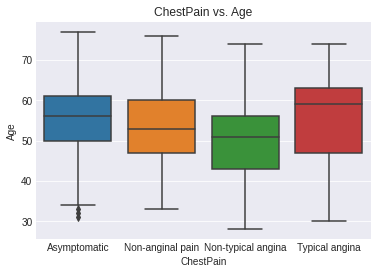

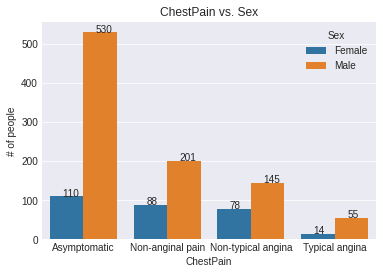

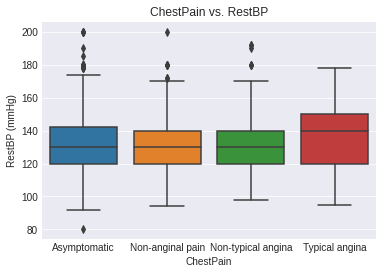

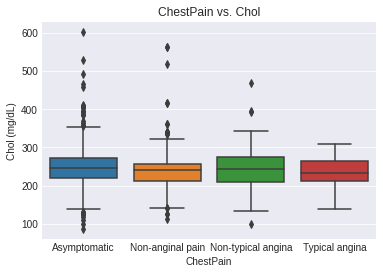

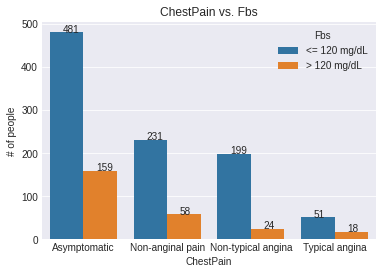

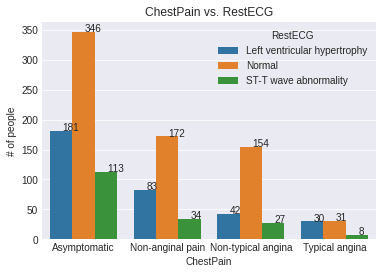

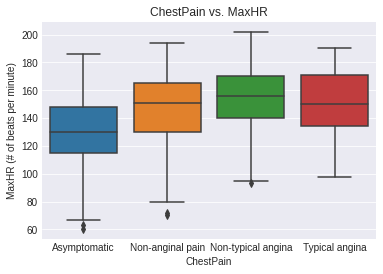

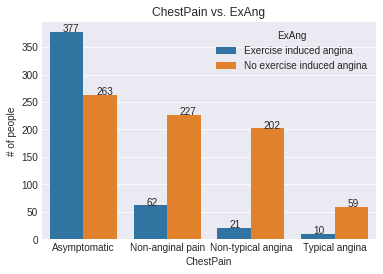

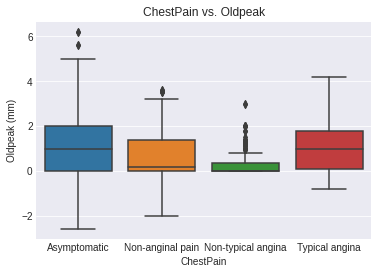

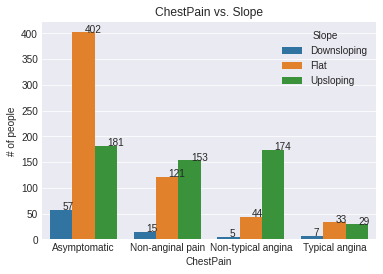

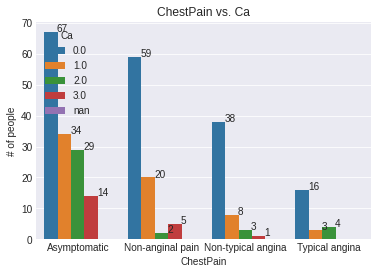

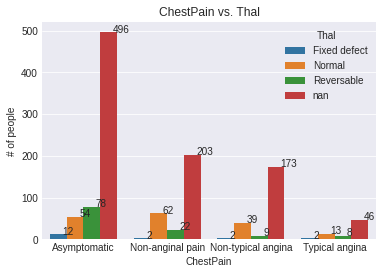

In [ ]:
task1_5(df, ["Age", "Sex", "RestBP", "Chol", "Fbs", "RestECG", "MaxHR", "ExAng", "Oldpeak", "Slope", "Ca", "Thal"])

### 1.6 Visualising attribute groups of two with respect to AHD

Since comparing most attribute groups of two against AHD only supports the observations already made based on previous visuals, only a few groups were selected for this step:
* Sex vs. Age vs. AHD: A striking observation is that although both males and females can be healthy at any age, females tend to develop heart diseases at only older ages (post 46-47), while males are at risk starting from around age 36.
* Fbs vs. Age vs. AHD: It looks like diabetic people can equally likely be healthy or sick in the same, rather narrow age range, whereas non-diabetic people generally develop heart diseases at slightly older ages. It should be noted that the distribution of age for non-diabetic people with respect to AHD is pretty wide in both cases.
* ExAng vs. Slope vs. AHD: People with flat slopes are very common among people with heart diseases, and most people with flat slopes also have exercise induced angina. From the looks of both graphs, upsloping slopes indicate healthy hearts, whereas flat slopes and downsloping slopes (to a lesser extent) indicate the opposite.
* RestBP vs. RestECG vs. AHD: Healthy people with normal RestECG have a small but notable positive difference in resting blood pressure from sick people with normal RestECG. Other boxes look practically the same.

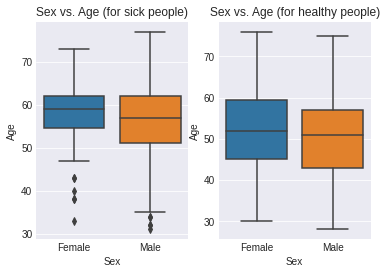

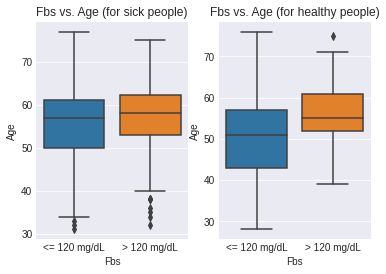

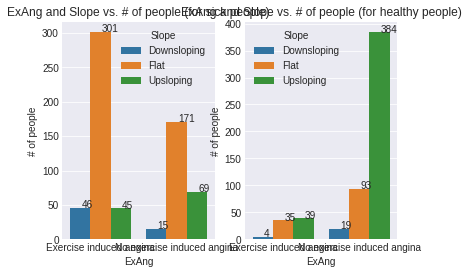

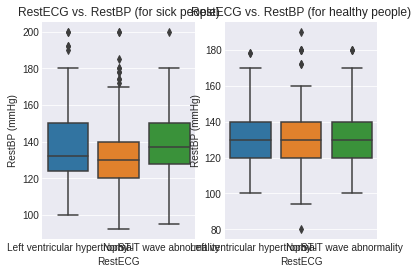

In [ ]:
task1_6(df, [["Sex", "Age"],
            ["Fbs", "Age"],
            ["ExAng", "Slope"],
            ["RestBP", "RestECG"]])

### 1.7 Visualising new features from the additional data set

Although the additional data set used was exceptionally rich, only a few features thought to be potentially interesting were chosen for inspection. 

Also, parameters such as Physical Health and Mental Health were found to be useless, probably due to the fact that values in this data set were not measured by professionals but self-reported. The group members think that this fact led to all but especially some vaguely defined attributes to be distorted by faulty (overestimations, underestimations, lies etc.) reports on the participants' part.

3D visualisation of two continuous attributes and one categorical attribute was specifically excluded due to its computational cumbersomeness and uselessness - there are way too many data points to analyse by eye.

Therefore, using some of the visualisation techniques and patterns used for the part with the main data set, the following observations were made:
* BMI vs. AHD: BMI follows an unexpected pattern for both sick and healthy people. Most prominently, it is unimodal for sick people but bimodal for healthy people. Making a definitive observation isn't possible at the moment; hypothesis testing should reveal the relationship.
* Smoking vs. AHD: From the looks of it, a higher percentage of smokers have heart diseases compared to non-smokers.
* Stroke vs. AHD: More than half of people who have had a stroke are inflicted with heart diseases, whereas the percentage is way lower for those who have not had a stroke. Stroke appears to be directly related to heart diseases.
* Race vs. AHD: Different races have notable differences in the ratio of the # of sick people to the # of healthy people. For example, Native Americans have the highest such ratio with 10.41%, and Asians have the least with 3.29%. Race may be linked to heart diseases.
* Smoking vs. Stroke vs. AHD: A higher percentage of sick smokers and non-smokers have had a stroke compared to healthy people, with the ratio of people who have had a stroke to smokers being higher than that to non-smokers. This supports the observed link between stroke and smoking to AHD.
* Stroke vs. Race vs. AHD: Races seem to have noticeably different stroke frequencies, which exhibits further variation between sick and healthy people.
* BMI vs. Race vs. AHD: The graph, as expected, shows that different races have different BMI ranges, but what is surprising is that these ranges exhibit little to no variation between sick and healthy people of the same races.


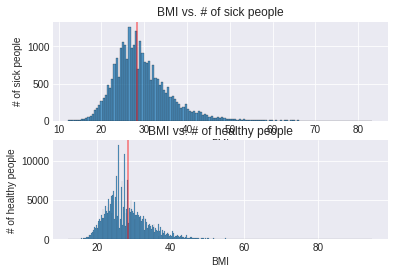

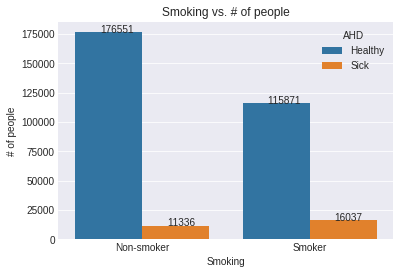

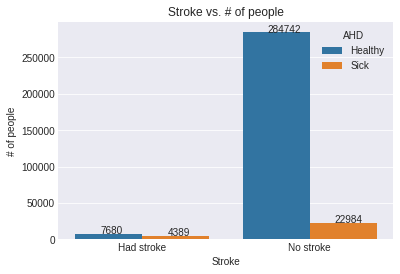

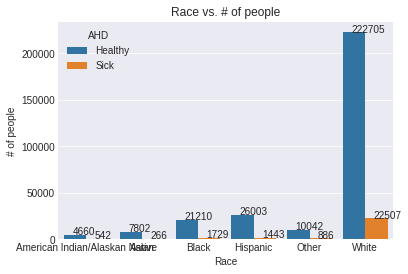

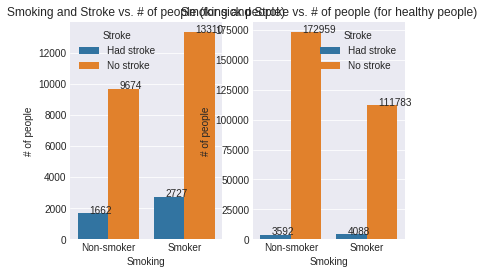

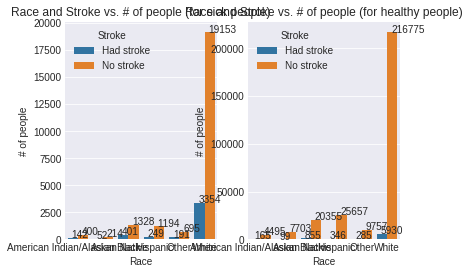

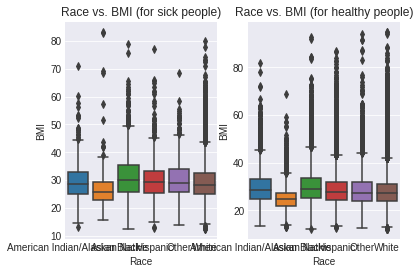

In [ ]:
task1_1(dfNew, ["BMI", "Smoking", "Stroke", "Race"])
#task1_2(dfNew, [["BMI", "Physical Health", "Smoking"],
#                ["BMI", "Physical Health", "Stroke"],
#                ["BMI", "Physical Health", "Race"]])
task1_6(dfNew, [["Smoking", "Stroke"],
                ["Race", "Stroke"],
                ["BMI", "Race"]])


# **Statistical Analysis and Hypothesis Testing**

Under the examination of the sample visual data that is enriched with additional datasets, it has been concluded that the following attributes should have a high possibility to have a relationship with heart disease of patients. Below stands the reasonings and the hypothesis. Therefore, the following hypothesis will form the central aim of this section, and following tests will be done in order to prove or disprove them:

ChestPain: People that are asymptomatic in regards to chest pain after an exercise test seem to be more likely to have heart diseases rather than other groups.

1. Chest pain probably has a relationship with heart disease.


RestBP: People with heart diseases tend to have resting blood pressures that are rather varied around the mean, while the resting blood pressures of healthy people are concentrated in certain ranges (with the biggest peak around 130 mmHg).

2. Resting blood pressure probably has a relationship with heart disease.

Chol: Even though the distribution of serum cholesterol levels look different in healthy and sick samples, they are actually very similar. The unusually high peak in the visual for sick people stems from the mean imputation performed on the data to treat missing values disguised as outliers (there were a considerable number of them). Therefore, it is hard to make a definitive comment now; hypothesis testing will show whether the difference is actually significant.

3. Cholesterol level probably has a relationship with heart disease.

Age: People with heart diseases tend to be older (with the biggest peak in the histogram around 60) than healthy people.

Sex: Females tend to be affected by heart diseases less.

4. Sex and Age probably has a relationship with heart disease.

With hypothesis testing, the sample data will be used in order to make an inference about the general population.

The datatype of AHD is categorical, and the complementary attributes vary by continuous and categorical data. If the attribute is categorical, we used chi-square test. Else, we used t-test for small sample size, and z-test for big enough sample size.

Under the statistical point of view, of the following tests will be the acceptence of having no relationship within the attribute & AHD (assuming that the mean of the attribute with AHD and without AHD is equal).

- **Null Hypothesis: no relationship between attribute & AHD (equal means)**
- **Alternative Hypothesis: there exists a relationship between attribute & AHD**

In this scope, the confidence interval is choosen to be %95. In these tests, if the following p-values' fall outside of our treshold ( if p-value < 0.05 ), we rejected the **Null hypothesis**, which implies significance of the **alternative hypothesis**. So, the rejection of the null hypothesis will be support of the hypothesises (1-4) that are introduced in the scope of this project.






In [ ]:
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest as ztest
from scipy import stats

# 2.1 Statistical tests to check whether the values of chest pain, RestBP and Chol contribute to heart disease or not.


1.  Chest Pain
2.  RestBP
3.  Chol  


## Chest Pain & AHD: categorical data & categorical data
For this part, chi-Square Test is used for the relationship between **AHD & Chest Pain**

The hypothesis of this part is as follows:

- **Null Hypothesis (H0)**: There is no relationship between ChestPain & AHD.
- **Alternate Hypothesis (H0)**: There is a significant relationship between ChestPain & AHD.

- After the test, the found result is as follows: **Chest pain probably affects AHD.**

In [ ]:
#create contingency table
ChestPain_AHD = pd.crosstab(index=df['AHD'], columns=df['ChestPain'], margins=True)
ChestPain_AHD

ChestPain,Asymptomatic,Non-anginal pain,Non-typical angina,Typical angina,All
AHD,,,,,
Healthy,143,199,190,42,574
Sick,497,90,33,27,647
All,640,289,223,69,1221


In [ ]:
#modeling the chi-square test
chiRes = stats.chi2_contingency(ChestPain_AHD)

# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

chi-square statistic: 347.5894791238133
p-value: 2.960603532472242e-70
degree of freedom: 8
expected contingency table
[[ 300.86814087  135.86076986  104.83374283   32.43734644  574.        ]
 [ 339.13185913  153.13923014  118.16625717   36.56265356  647.        ]
 [ 640.          289.          223.           69.         1221.        ]]


The p-value is found as: 2.960603532472242e-70
Since the p-value is smaller then 0.05, the null hypothesis is rejected. Therefore, it is significant that chest pain and AHD has an relationship.

## RestBP & AHD: continous data & categorical data
- Using t-test for RestBP & AHD
- Null Hypothesis: Resting Blood Pressure has no effect on AHD
- Alternative Hypothesis: Resting Blood Pressure has an effect on AHD

p-value found as: 8.31262696999099e-06

- p-value < 0.05 is satisfied. Therefore, rejecting Null hypothesis.
- Result: **RestBP probably effects AHD**

In [ ]:
#create contingency table
RestBP_AHD = pd.crosstab(index=df['AHD'], columns=df['RestBP'], margins=True)
RestBP_AHD

RestBP,0,80,92,94,95,96,98,100,101,102,...,170,172,174,178,180,185,190,192,200,All
AHD,,,,,,,,,,,,,,,,,,,,,
Healthy,0,1,0,4,0,0,1,10,2,4,...,4,2,0,2,7,0,1,0,0,574
Sick,1,0,1,0,6,1,0,9,0,1,...,14,1,2,3,8,1,1,2,5,647
All,1,1,1,4,6,1,1,19,2,5,...,18,3,2,5,15,1,2,2,5,1221


In [ ]:
healthy = df[df['AHD']=='Healthy']
sick = df[df['AHD']=='Sick']

res = ttest_ind(healthy['RestBP'], sick['RestBP'])
res

Ttest_indResult(statistic=-4.4761133045537855, pvalue=8.31262696999099e-06)

## Chol & AHD: continuous data & categorical data
- using T-test
- p-value is smaller than 5%, therefore rejecting Null Hypothesis. 
- result: **Serum cholesterol level probably affects AHD.**

In [ ]:
#create contingency table
Chol_AHD = pd.crosstab(index=df['AHD'], columns=df['Chol'], margins=True)
Chol_AHD

Chol,0,85,100,110,113,117,123,126,129,131,...,417,458,466,468,491,518,529,564,603,All
AHD,,,,,,,,,,,,,,,,,,,,,
Healthy,20,1,1,0,0,0,0,2,1,0,...,2,1,0,1,0,0,0,2,0,574
Sick,152,0,1,1,1,1,1,1,0,2,...,0,0,1,0,1,1,1,0,1,647
All,172,1,2,1,1,1,1,3,1,2,...,2,1,1,1,1,1,1,2,1,1221


In [ ]:
res2 = ttest_ind(healthy['Chol'], sick['Chol'])
res2

Ttest_indResult(statistic=-3.2994005707968137, pvalue=0.0009969174086643516)

# 2.2 Statistical Tests to check whether age and sex contribute to heart disease or not

Groups that will be tested under this part:


1.   Age & AHD
2.   Sex & AHD



### Age & AHD: continous & categorical data

- using T-test
- p-value is smaller than 5%, therefore rejecting Null Hypothesis. 
- result: **Age probably affect AHD**

In [ ]:
#create contingency table
Age_AHD = pd.crosstab(index=df['AHD'], columns=df['Age'], margins=True)
Age_AHD

Age,28,29,30,31,32,33,34,35,36,37,...,69,70,71,72,73,74,75,76,77,All
AHD,,,,,,,,,,,,,,,,,,,,,
Healthy,1,4,1,1,3,1,7,9,4,12,...,5,2,6,1,0,3,1,2,0,574
Sick,0,0,0,1,2,1,2,6,2,1,...,11,9,2,3,1,5,2,1,3,647
All,1,4,1,2,5,2,9,15,6,13,...,16,11,8,4,1,8,3,3,3,1221


In [ ]:
res = ttest_ind(healthy['Age'], sick['Age'])
res

Ttest_indResult(statistic=-9.52350616484309, pvalue=8.661310361844436e-21)

## Sex & AHD: categorical & categorical data

- using chi-square test
- p-value is smaller than 5%, therefore rejecting Null Hypothesis. 

- result: Sex probably affect AHD

In [ ]:
#create contingency table
Sex_AHD = pd.crosstab(index=df['Sex'], columns=df['AHD'], margins=True)
Sex_AHD

AHD,Healthy,Sick,All
Sex,,,
Female,215,75,290
Male,359,572,931
All,574,647,1221


In [ ]:
#chi-square test
chiRes = stats.chi2_contingency(Sex_AHD)

# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])


chi-square statistic: 112.35483458365752
p-value: 2.289191880958576e-23
degree of freedom: 4
expected contingency table
[[ 136.33087633  153.66912367  290.        ]
 [ 437.66912367  493.33087633  931.        ]
 [ 574.          647.         1221.        ]]


# 2.3 Statistical tests to check if significant differences exist between age groups and sex that suffer from heart disease

The ages are grouped as under average and above average to understand the inference (average of the data is calculated as 53.74119574119574, shown below). The age groups are tested accordingly to gender (female and male).

In [ ]:
df["Age"].mean()

53.74119574119574

In [ ]:
aboveAv_adults = df[df["Age"] >= 53.74119574119574]
underAv_adults = df[df["Age"] < 53.74119574119574]

theList = []
for elem in df["Age"].values:

  if elem >= 53.74119574119574 :
    theList.append("above")
  else:
    theList.append("under")

df["Age-Gap"] = theList


In [ ]:
female_ = df[df["Sex"] == "Female"]
male_ = df[df["Sex"] == "Male"]

In [ ]:
#create contingency table
onlyfemale = pd.crosstab(index= female_['AHD'], columns = female_["Age-Gap"], margins=True)
onlyfemale

Age-Gap,above,under,All
AHD,,,
Healthy,96,119,215
Sick,59,16,75
All,155,135,290


In [ ]:
#chi-square test
chiRes = stats.chi2_contingency(onlyfemale)

# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

chi-square statistic: 25.857472516277216
p-value: 3.3809044742441076e-05
degree of freedom: 4
expected contingency table
[[114.9137931 100.0862069 215.       ]
 [ 40.0862069  34.9137931  75.       ]
 [155.        135.        290.       ]]


In [ ]:
#create contingency table
onlymale = pd.crosstab(index= male_['AHD'], columns = male_["Age-Gap"], margins=True)
onlymale

Age-Gap,above,under,All
AHD,,,
Healthy,143,216,359
Sick,376,196,572
All,519,412,931


In [ ]:
#chi-square test
chiRes = stats.chi2_contingency(onlymale)

# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])


chi-square statistic: 59.98213913642814
p-value: 2.9260419288692438e-12
degree of freedom: 4
expected contingency table
[[200.12996778 158.87003222 359.        ]
 [318.87003222 253.12996778 572.        ]
 [519.         412.         931.        ]]


As a result, tests from both female and male have shown that AHD and age group has p-value that is smaller than 5%, therefore rejected the Null Hypothesis, and underlined the significance of the relationship.


# 2.4 Statistical tests to check how all those attributes contribute to heart disease

In this section, the tests will be done for:

* Fbs (correlation found)
* RestECG (correlation found)
* MaxHR (correlation found)
* Exang (correlation found)
* Oldpeak (correaltion found)
* Slope (correaltion found)
* Ca (correaltion found)



## Fbs & AHD: categorical & categorical

- using chi-square test
- p-value is smaller than 5%, therefore rejecting Null Hypothesis. 
- Result: **Fbs probably does affect AHD**

In [ ]:
#create contingency table
Fbs_AHD = pd.crosstab(index=df['Fbs'], columns=df['AHD'], margins=True)
Fbs_AHD

AHD,Healthy,Sick,All
Fbs,,,
<= 120 mg/dL,507,455,962
> 120 mg/dL,67,192,259
All,574,647,1221


In [ ]:
#chi-square test
chiRes = stats.chi2_contingency(Fbs_AHD)

# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])


chi-square statistic: 58.98538358684219
p-value: 4.73895365798655e-12
degree of freedom: 4
expected contingency table
[[ 452.24242424  509.75757576  962.        ]
 [ 121.75757576  137.24242424  259.        ]
 [ 574.          647.         1221.        ]]


## RestECG & AHD: categorical & categorical

- using chi-square test
- p-value is smaller than 5%, therefore rejecting Null Hypothesis.
- result: **RestECG probably does affect AHD**

In [ ]:
#create contingency table
RestEcg_AHD = pd.crosstab(index=df['RestECG'], columns=df['AHD'], margins=True)
RestEcg_AHD

AHD,Healthy,Sick,All
RestECG,,,
Left ventricular hypertrophy,150,186,336
Normal,362,341,703
ST-T wave abnormality,62,120,182
All,574,647,1221


In [ ]:
#chi-square test
chiRes = stats.chi2_contingency(RestEcg_AHD)

# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

chi-square statistic: 18.670252174960567
p-value: 0.0047583322588716755
degree of freedom: 6
expected contingency table
[[ 157.95577396  178.04422604  336.        ]
 [ 330.48484848  372.51515152  703.        ]
 [  85.55937756   96.44062244  182.        ]
 [ 574.          647.         1221.        ]]


## MaxHR & AHD: continuous & categorical

- using t-test test
- p-value is smaller than 5%, therefore rejecting Null Hypothesis.
- result: **MaxHR probably does affect AHD**

In [ ]:
#create contingency table
MaxHR_AHD = pd.crosstab(index=df['MaxHR'], columns=df['AHD'], margins=True)
MaxHR_AHD

AHD,Healthy,Sick,All
MaxHR,,,
60,0,1,1
63,0,1,1
67,0,1,1
69,1,0,1
70,0,1,1
...,...,...,...
192,2,0,2
194,2,0,2
195,0,2,2


In [ ]:
res = ttest_ind(healthy['MaxHR'], sick['MaxHR'])
res

Ttest_indResult(statistic=15.724128852255443, pvalue=7.234976437551569e-51)

## Exang & AHD: categorical & categorical

- using chi-square-test
- p-value is smaller than 5%, therefore rejecting Null Hypothesis.
- result: ExAng probably does affect AHD

In [ ]:
#create contingency table
Exang_AHD = pd.crosstab(index=df['ExAng'], columns=df['AHD'], margins=True)
Exang_AHD

AHD,Healthy,Sick,All
ExAng,,,
Exercise induced angina,78,392,470
No exercise induced angina,496,255,751
All,574,647,1221


In [ ]:
#chi-square test
chiRes = stats.chi2_contingency(Exang_AHD)

# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

chi-square statistic: 283.7668060773584
p-value: 3.434019617786408e-60
degree of freedom: 4
expected contingency table
[[ 220.95004095  249.04995905  470.        ]
 [ 353.04995905  397.95004095  751.        ]
 [ 574.          647.         1221.        ]]


## Oldpeak & AHD: continuous & categorical

- using t-test
- p-value is smaller than 5%, therefore rejecting Null Hypothesis.
- result: **Oldpeak probably does affect AHD**

In [ ]:
#create contingency table
Oldpeak_AHD = pd.crosstab(index=df['AHD'], columns=df['Oldpeak'], margins=True)
Oldpeak_AHD

Oldpeak,-2.6,-2.0,-1.5,-1.1,-1.0,-0.9,-0.8,-0.7,-0.5,-0.1,...,3.6,3.7,3.8,4.0,4.2,4.4,5.0,5.6,6.2,All
AHD,,,,,,,,,,,,,,,,,,,,,
Healthy,0,0,0,1,0,0,0,0,1,2,...,0,0,0,0,2,0,0,0,0,574
Sick,1,1,1,0,2,1,1,1,1,0,...,8,1,2,11,2,2,1,2,2,647
All,1,1,1,1,2,1,1,1,2,2,...,8,1,2,11,4,2,1,2,2,1221


In [ ]:
res = ttest_ind(healthy['Oldpeak'], sick['Oldpeak'])
res

Ttest_indResult(statistic=-15.33221161319946, pvalue=1.1885027523601618e-48)

## Slope & AHD: categorical & categorical

- using chi-square-test
- p-value is smaller than 5%, therefore rejecting Null Hypothesis.
- result: **Slope probably does affect AHD**

In [ ]:
#create contingency table
Slope_AHD = pd.crosstab(index=df['AHD'], columns=df['Slope'], margins=True)
Slope_AHD

Slope,Downsloping,Flat,Upsloping,All
AHD,,,,
Healthy,23,128,423,574
Sick,61,472,114,647
All,84,600,537,1221


In [ ]:
#chi-square test
chiRes = stats.chi2_contingency(Slope_AHD)

# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

chi-square statistic: 389.24852269845155
p-value: 5.722476717091886e-81
degree of freedom: 6
expected contingency table
[[  39.48894349  282.06388206  252.44717445  574.        ]
 [  44.51105651  317.93611794  284.55282555  647.        ]
 [  84.          600.          537.         1221.        ]]


## Ca & AHD: continuous & categorical

- using chi-square-test
- p-value is smaller than 5%, therefore rejecting Null Hypothesis.
- result: **Ca probably does affect AHD**

In [ ]:
#create contingency table
Ca_AHD = pd.crosstab(index=df['AHD'], columns=df['Ca'], margins=True)
Ca_AHD

Ca,0.0,1.0,2.0,3.0,All
AHD,,,,,
Healthy,133,21,7,3,164
Sick,47,44,31,17,139
All,180,65,38,20,303


In [ ]:
#chi-square test
chiRes = stats.chi2_contingency(Ca_AHD)

# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

chi-square statistic: 72.61688644147385
p-value: 1.4779689513342714e-12
degree of freedom: 8
expected contingency table
[[ 97.42574257  35.18151815  20.56765677  10.82508251 164.        ]
 [ 82.57425743  29.81848185  17.43234323   9.17491749 139.        ]
 [180.          65.          38.          20.         303.        ]]


# 2.5 Utilizing at least four new features using extra datasets in hypothesis testing
Following new features are added:
- BMI
- Smoking
- Asthma
- Race

Since the new sample size is bigger than the 10% of American population,
z-test is used for continuous data.


In [ ]:
healthy = dfNew[dfNew['AHD']=='Healthy']
sick = dfNew[dfNew['AHD']=='Sick']

## BMI & AHD: continuous & categorical data
- p-value is smaller than 5%, therefore rejecting Null Hypothesis.
- result: **BMI probably does affect AHD**


In [ ]:
#create contingency table
BMI_AHD = pd.crosstab(index=dfNew['AHD'], columns=dfNew['BMI'], margins=True)
BMI_AHD

BMI,12.02,12.08,12.13,12.16,12.2,12.21,12.26,12.27,12.4,12.44,...,88.19,88.6,91.55,91.82,92.53,93.86,93.97,94.66,94.85,All
AHD,,,,,,,,,,,,,,,,,,,,,
Healthy,2,1,1,1,1,0,1,1,2,1,...,1,1,2,1,1,1,1,1,1,292422
Sick,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,27373
All,2,1,1,1,1,1,1,1,3,1,...,1,1,2,1,1,1,1,1,1,319795


In [ ]:
ztest(healthy["BMI"], sick["BMI"], value=0) 

(-29.33421693628801, 3.7989935617564684e-189)

##Smoking & AHD: categorical & categorical
- p-value is smaller than 5%, therefore rejecting Null Hypothesis.
- result: Smoking probably does affect AHD


In [ ]:
#create contingency table
Smoking_AHD = pd.crosstab(index=dfNew['Smoking'], columns=dfNew['AHD'], margins=False)
Smoking_AHD

AHD,Healthy,Sick
Smoking,,
Non-smoker,176551,11336
Smoker,115871,16037


In [ ]:
#chi-square test
chiRes = stats.chi2_contingency(Smoking_AHD)

# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

chi-square statistic: 3713.0331469808216
p-value: 0.0
degree of freedom: 1
expected contingency table
[[171804.72588377  16082.27411623]
 [120617.27411623  11290.72588377]]


## Asthma & AHD: categorical & categorical
- p-value is smaller than 5%, therefore rejecting Null Hypothesis.
- result: **Asthma probably does affect AHD**


In [ ]:
#create contingency table
Asthma_AHD = pd.crosstab(index=dfNew['Asthma'], columns=dfNew['AHD'], margins=False)
Asthma_AHD

AHD,Healthy,Sick
Asthma,,
Asthmatic,37939,4933
Healthy,254483,22440


In [ ]:
#chi-square test
chiRes = stats.chi2_contingency(Asthma_AHD)

# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

chi-square statistic: 548.8508413264418
p-value: 2.2386144306283177e-121
degree of freedom: 1
expected contingency table
[[ 39202.3514564   3669.6485436]
 [253219.6485436  23703.3514564]]


## Race & AHD
- p-value is smaller than 5%, therefore rejecting Null Hypothesis.
- result: **Race probably does affect AHD**

In [ ]:
#create contingency table
Race_AHD = pd.crosstab(index=dfNew['AHD'], columns=dfNew['Race'], margins=False)
Race_AHD

Race,American Indian/Alaskan Native,Asian,Black,Hispanic,Other,White
AHD,,,,,,
Healthy,4660,7802,21210,26003,10042,222705
Sick,542,266,1729,1443,886,22507


In [ ]:
#chi-square test
chiRes = stats.chi2_contingency(Race_AHD)

# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

chi-square statistic: 844.3148859632537
p-value: 2.9886131565632597e-180
degree of freedom: 5
expected contingency table
[[  4756.73241921   7377.41583202  20975.52575244  25096.74701606
    9992.61281759 224222.9661627 ]
 [   445.26758079    690.58416798   1963.47424756   2349.25298394
     935.38718241  20989.0338373 ]]


## Stroke & AHD
- p-value is smaller than 5%, therefore rejecting Null Hypothesis.
- result: **Stroke probably does affect AHD**

In [ ]:
#create contingency table
Stroke_AHD = pd.crosstab(index=dfNew['Stroke'], columns=dfNew['AHD'], margins=False)
Stroke_AHD

AHD,Healthy,Sick
Stroke,,
Had stroke,7680,4389
No stroke,284742,22984


In [ ]:
#chi-square test
chiRes = stats.chi2_contingency(Stroke_AHD)

# Details
print(f'chi-square statistic: {chiRes[0]}')
print(f'p-value: {chiRes[1]}')
print(f'degree of freedom: {chiRes[2]}')
print('expected contingency table') 
print(chiRes[3])

chi-square statistic: 12386.4888802668
p-value: 0.0
degree of freedom: 1
expected contingency table
[[ 11035.94839819   1033.05160181]
 [281386.05160181  26339.94839819]]


# Results of Statistical Tests
According to the results, our main hypothesis set has passed the statistical tests with their p-values. By rejecting the Null hypothesis, it has been proved that:

1. Chest Pain has an relationship with AHD status
2. Resting Blood Pressure has an relationship with AHD
3. Serum cholesterol level has an relationship with AHD
4. Gender and age has a relationship with AHD

As an additional remark, all the other attributes also showed significant relationship with AHD.

# **Machine Learning**

# 3.1 Prediction of heart disease given values of age, sex, chest pain and RestBP

Given values are divided into categorical and continuous variable groups and treated accordingly. The machine learning tests that were used are k-Nearest Neighbors (kNN) for categorical variables and Multiple Linear Regression for continuous variables.

Categorical Variables:
1. Sex
2. Chest Pain

Continuous Variables:
1. Age
2. RestBP

Below, the list of libraries used for the machine learning part can be seen. The library sklearn is extensively used in this part to employ different machine learning models.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from os.path import join
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor 

## Preparing the original dataframe for the evaluation of the variables (RestBP, Age, Sex, and ChestPain)

Since Ca and Thal variables were not included in the hypothesis testing section, they are removed from the original dataframe for this part (restbp, age, sex and chest pain values' prediction) only. In addition, the 'nan' values under the Chol and RestBP categories are substituted with their mean values respectively. 

In [ ]:
#deleted Thal and Ca values as they were not included in the hypothesis section and substituted mean values to Chol and RestBP
del df['Ca']  
del df["Thal"]

df["Chol"].fillna(df["Chol"].mean(), inplace=True) 
df["RestBP"].fillna(df["RestBP"].mean(), inplace=True) 

Afterwards, categorical and continuous values are divided from the columns of the dataframe. The categorical values are divided into groups individually and the data is replaced with numerical values (via .get_dummies() function) for the application of the kNN algorithm. The change can be observed from the output, where the first two rows are visible.

In [ ]:
categorical_val = []  
continous_val = []
for column in df.columns:
    #print("--------------------")
    #print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

#print(categorical_val)

#categorical_val.remove('target')
dfs = pd.get_dummies(df, columns = categorical_val)

dfs.head(2)

,Age,RestBP,Chol,MaxHR,Oldpeak,Sex_Female,Sex_Male,ChestPain_Asymptomatic,ChestPain_Non-anginal pain,ChestPain_Non-typical angina,...,RestECG_Left ventricular hypertrophy,RestECG_Normal,RestECG_ST-T wave abnormality,ExAng_Exercise induced angina,ExAng_No exercise induced angina,Slope_Downsloping,Slope_Flat,Slope_Upsloping,AHD_Healthy,AHD_Sick
0,63,145.0,233.0,150,2.3,0,1,0,0,0,...,1,0,0,0,1,1,0,0,1,0
1,67,160.0,286.0,108,1.5,0,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1


## Sex
As said, this variable will be treated by the kNN algorithm. 
- Trial k value is taken to be k=3
- Trial accuracy score: 0.7869 (roughly) (visible in the output)

In [ ]:
X = dfs.drop(['Sex_Female', 'Sex_Male'], axis=1)
y = dfs.Sex_Female


# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train,y_train)



y_pred1 = knn.predict(X_test)

print("k value is taken to be k=3 for a trial before the hyperparameter optimization. Trial accuracy score:",accuracy_score(y_test,y_pred1))

k value is taken to be k=3 for a trial before the hyperparameter optimization. Trial accuracy score: 0.7868852459016393


## Chest Pain
As said, this value will be treated by the kNN algorithm. 
- Trial k value is taken to be k=3
- Trial accuracy score: 0.7049 (roughly) (visible in the output)

In [ ]:
X = dfs.drop(['ChestPain_Asymptomatic', 'ChestPain_Non-anginal pain', 'ChestPain_Non-typical angina', 'ChestPain_Typical angina'], axis=1)
y = dfs.ChestPain_Asymptomatic

# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train,y_train)



y_pred1 = knn.predict(X_test)

print("k value is taken to be k=3 for a trial before the hyperparameter optimization. Trial accuracy score:",accuracy_score(y_test,y_pred1))

k value is taken to be k=3 for a trial before the hyperparameter optimization. Trial accuracy score: 0.7049180327868853


## Age
As said, this value will be treated by the Multiple Linear Regression algorithm. 

The R2 Score result is 0.2416 (full result available in the output part at the end)

Replacing categorical variables with 0, 1, 2, 3,... etc for ML purposes

In [ ]:
df['Sex'].replace(['Male', 'Female'], [0, 1], inplace=True)
df['Fbs'].replace(['> 120 mg/dL', '<= 120 mg/dL'], [0, 1], inplace=True)
df['RestECG'].replace(['Left ventricular hypertrophy', 'Normal', 'ST-T wave abnormality'], [0, 1, 2], inplace=True)
df['ExAng'].replace(['No exercise induced angina', 'Exercise induced angina'], [0, 1], inplace=True)
df['AHD'].replace(['Healthy', 'Sick'], [0, 1], inplace=True)
df['Slope'].replace(['Downsloping', 'Flat', 'Upsloping'], [0, 1, 2], inplace=True)
df['ChestPain'].replace(['Typical angina', 'Asymptomatic', 'Non-anginal pain', 'Non-typical angina'], [0, 1, 2, 3], inplace=True)

Creating a list of variables that excludes our target variabe for ML analysis

In [ ]:
list1 = []

for col in df.columns:
  list1.append(col)

list1.remove("Age")

print(list1)


['Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'AHD']


Converting the data to column vector format for ML

In [ ]:
X = df[list1].values  
y = df['Age'].values

Splitting the data between Train and Test partitions in a 80-20 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Setting the model to be Linear Regression

In [ ]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

Inspecting the coefficients to gather information about the data

In [ ]:
coeff_df = pd.DataFrame(model.coef_, list1, columns=['Coefficient']) 
print("Taking a look at the coefficients:")
print(" ")
print("coeff_df:")
print(" ")
print(coeff_df)
print(" ")
print("model.intercept_:")
print(" ")
print(model.intercept_)
print(" ")
print("model.coef_:")
print(" ")
print(model.coef_)
print(" ")

Taking a look at the coefficients:
 
coeff_df:
 
           Coefficient
Sex           1.194571
ChestPain    -0.489359
RestBP        0.113574
Chol          0.007279
Fbs          -2.039835
RestECG      -1.422881
MaxHR        -0.117096
ExAng        -0.876939
Oldpeak       0.909028
Slope        -0.009202
AHD           1.137002
 
model.intercept_:
 
55.493659264305506
 
model.coef_:
 
[ 1.1945714  -0.48935863  0.11357415  0.00727921 -2.03983516 -1.42288106
 -0.11709573 -0.87693915  0.90902829 -0.00920205  1.13700222]
 


Checking for model accuracy with Mean Square Error, Mean Absolute Error and Root Mean Square Error

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Checking Model Accuracy:")
print(" ")
print("Mean Square Error:")
print(" ")
print("mse: {}".format(mse))
print(" ")
print("Mean Absolute Error:")
print(" ")
print("mae: {}".format(mae))
print(" ")
print("Root Mean Square Error:")
print(" ")
print("rmse: {}".format(rmse))
print(" ")


Checking Model Accuracy:
 
Mean Square Error:
 
mse: 71.78466027506968
 
Mean Absolute Error:
 
mae: 6.993815423727596
 
Root Mean Square Error:
 
rmse: 8.472582857374112
 


Checking for model accuracy with R2 Score

In [ ]:
def r2(y_true, y_pred):
  u = sum((y_true - y_pred)**2)
  v = sum((y_true - y_true.mean())**2)

  return 1-(u/v)
print("R2 Score Result:")
print(" ")
r2(y_test, y_pred)


R2 Score Result:
 


0.24162049204918012

## RestBP

As said, this value will once again be treated by the Multiple Linear Regression algorithm.

The R2 Score result is ~0.0015 (full result available in the output part at the end)

Creating a list of variables that excludes our target variabe for ML analysis

In [ ]:
list1 = []

for col in df.columns:
  list1.append(col)

list1.remove("RestBP")

print(list1)


['Age', 'Sex', 'ChestPain', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'AHD']


Converting the data to column vector format for ML

In [ ]:
X = df[list1].values  
y = df['RestBP'].values

Splitting the data between Train and Test partitions in a 80-20 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Setting the model to be Linear Regression

In [ ]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

Inspecting the coefficients to gather information about the data

In [ ]:
coeff_df = pd.DataFrame(model.coef_, list1, columns=['Coefficient']) 
print("Taking a look at the coefficients:")
print(" ")
print("coeff_df:")
print(" ")
print(coeff_df)
print(" ")
print("model.intercept_:")
print(" ")
print(model.intercept_)
print(" ")
print("model.coef_:")
print(" ")
print(model.coef_)
print(" ")

Taking a look at the coefficients:
 
coeff_df:
 
           Coefficient
Age           0.488591
Sex           2.156545
ChestPain    -0.132751
Chol          0.023908
Fbs          -2.291137
RestECG       0.369186
MaxHR         0.050339
ExAng         2.540737
Oldpeak       2.069538
Slope         1.084875
AHD           0.949345
 
model.intercept_:
 
89.05075875540926
 
model.coef_:
 
[ 0.48859074  2.15654475 -0.13275098  0.02390814 -2.29113685  0.36918632
  0.0503387   2.54073667  2.06953813  1.08487509  0.94934512]
 


Checking for model accuracy with Mean Square Error, Mean Absolute Error and Root Mean Square Error

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Checking Model Accuracy:")
print(" ")
print("Mean Square Error:")
print(" ")
print("mse: {}".format(mse))
print(" ")
print("Mean Absolute Error:")
print(" ")
print("mae: {}".format(mae))
print(" ")
print("Root Mean Square Error:")
print(" ")
print("rmse: {}".format(rmse))
print(" ")


Checking Model Accuracy:
 
Mean Square Error:
 
mse: 336.6661981809835
 
Mean Absolute Error:
 
mae: 14.129422693962615
 
Root Mean Square Error:
 
rmse: 18.348465826356804
 


Checking for model accuracy with R2 Score

In [ ]:
def r2(y_true, y_pred):
  u = sum((y_true - y_pred)**2)
  v = sum((y_true - y_true.mean())**2)

  return 1-(u/v)
print("R2 Score Result:")
print(" ")
r2(y_test, y_pred)


R2 Score Result:
 


0.001527104742142349

# 3.2 Performing hyper-parameter tuning to increase model performance



## Sex
The hyperparameter k is plotted in the model with respect to the accuracy scores it gives with a range of 1 to 20. From the generated model, the k value that gives the highest accuracy score is observed to be k=1. 
- Highest accuracy score: 0.8279 (roughly) (visible in the output)

k value is taken to be k=3 for a trial before the hyperparameter optimization. Trial accuracy score: 0.7868852459016393
Result of k=1 is the highest accuracy value as can be seen in the graph. Accuracy score: 0.8278688524590164


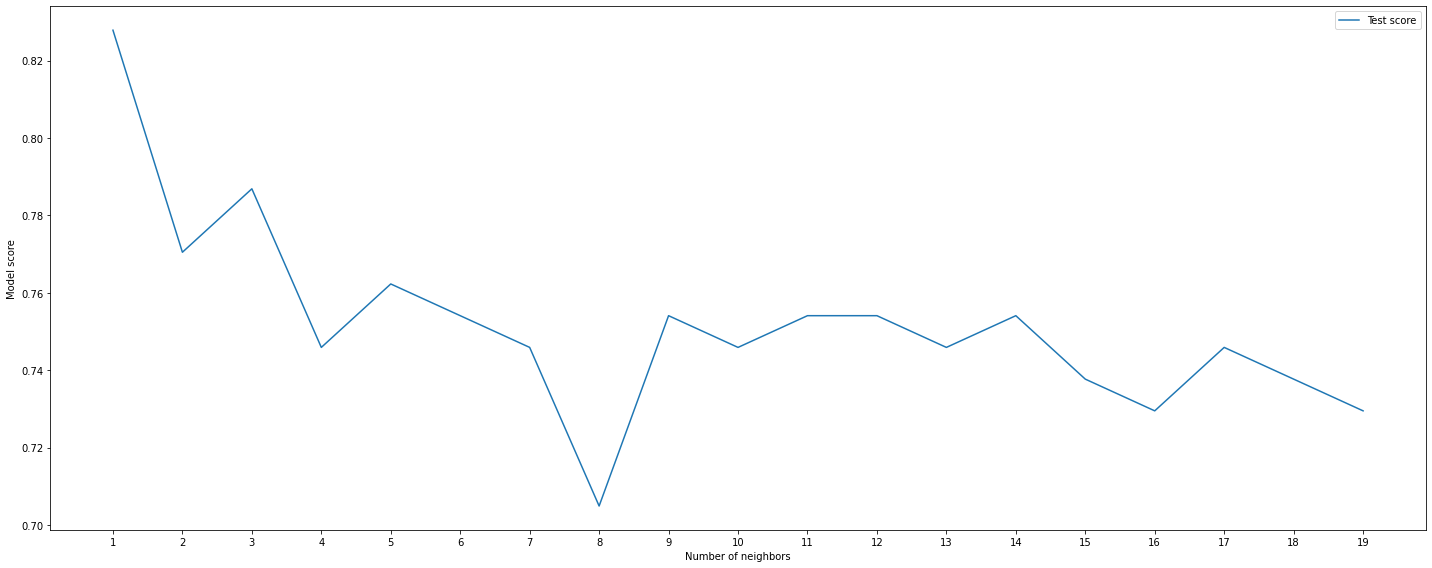

In [ ]:
X = dfs.drop(['Sex_Female', 'Sex_Male'], axis=1)
y = dfs.Sex_Female
y = dfs.Sex_Male


# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train,y_train)

y_pred1 = knn.predict(X_test)

print("k value is taken to be k=3 for a trial before the hyperparameter optimization. Trial accuracy score:",accuracy_score(y_test,y_pred1))

####################### HYPERPARAMETER TUNING #######################

test_score = []
neighbors = range(1, 20)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))


plt.figure(figsize=(20, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

knn = KNeighborsClassifier(n_neighbors = 1)  #k=1 is our highest accuracy value!!
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
print("Result of k=1 is the highest accuracy value as can be seen in the graph. Accuracy score:" , accuracy_score(y_test,y_pred1))

## Chest Pain
The hyperparameter k is plotted in the model with respect to the accuracy scores it gives with a range of 1 to 20. From the generated model, the k value that gives the highest accuracy score is observed to be k=1. 
- Highest accuracy score: 0.7787 (roughly) (visible in the output)

k value is taken to be k=3 for a trial before the hyperparameter optimization. Trial accuracy score: 0.7049180327868853
Result of k=1 is the highest accuracy value as can be seen in the graph. Accuracy score: 0.7786885245901639


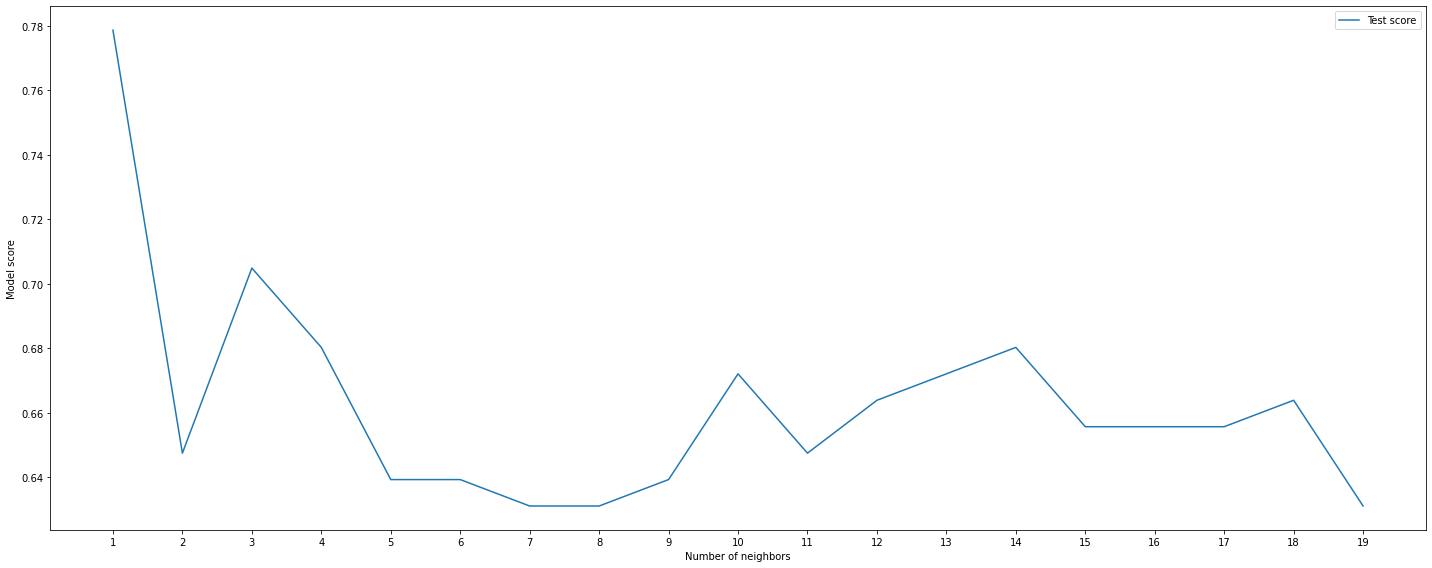

In [ ]:
X = dfs.drop(['ChestPain_Asymptomatic', 'ChestPain_Non-anginal pain', 'ChestPain_Non-typical angina', 'ChestPain_Typical angina'], axis=1)
y = dfs.ChestPain_Asymptomatic

# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train,y_train)



y_pred1 = knn.predict(X_test)

print("k value is taken to be k=3 for a trial before the hyperparameter optimization. Trial accuracy score:",accuracy_score(y_test,y_pred1))

####################### HYPERPARAMETER TUNING #######################

test_score = []
neighbors = range(1, 20)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))


plt.figure(figsize=(20, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

knn = KNeighborsClassifier(n_neighbors = 1)  #k=1 is our highest accuracy value!!
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
print("Result of k=1 is the highest accuracy value as can be seen in the graph. Accuracy score:" , accuracy_score(y_test,y_pred1))

# 3.8 Utilizing at least four new features using additional datasets in machine learning models

From the additional dataset; BMI, smoking, stroke, and race is taken. Smoking, stroke, and race are evaluated by k-Nearest Neighbor algorithm, since they are categorical variables. BMI is evaluated by Multiple Linear Regression, since it is a continuous variable.

## Preparing the additional dataframe for the evaluation of the categorical and continuous variables (BMI, smoking, stroke, race)

Since Age Category variable was not included in the hypothesis testing section, it is removed from the original dataframe for this part (smoking, stroke, and race values' prediction) only. In addition, the 'nan' values under the Sleep Time category are substituted with their mean values respectively. 

In [ ]:
del dfNew["Age Category"]
dfNew["Sleep Time"].fillna(dfNew["Sleep Time"].mean(), inplace=True)

Afterwards, categorical and continuous values are divided from the columns of the dataframe. The categorical values are divided into groups individually and the data is replaced with numerical values (via .get_dummies() function) for the application of the kNN algorithm. The change can be observed from the output, where the first two rows are visible.

In [ ]:
categorical_val = []  
continous_val = []
for column in dfNew.columns:
    #print("--------------------")
    #print(f"{column} : {dfNew[column].unique()}")
    if len(dfNew[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

#print(categorical_val)

#categorical_val.remove('target')
dfs = pd.get_dummies(dfNew, columns = categorical_val)

dfs.head(2)

,BMI,Physical Health,Mental Health,Sleep Time,AHD_Healthy,AHD_Sick,Smoking_Non-smoker,Smoking_Smoker,Alcohol Drinking_Drinker,Alcohol Drinking_Non-drinker,...,General Health_Fair,General Health_Good,General Health_Poor,General Health_Very good,Asthma_Asthmatic,Asthma_Healthy,Kidney Disease_Has kidney disease(s),Kidney Disease_Healthy,Skin Cancer_Has skin cancer,Skin Cancer_Healthy
0,16.60,3.0,30.0,5.0,1,0,0,1,0,1,...,0,0,0,1,1,0,0,1,1,0
1,20.34,0.0,0.0,7.0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,1


## Smoking
As said, this value will be treated by the kNN algorithm. 
- Trial k value is taken to be k=3
- Trial accuracy score: 0.5773 (roughly) (visible in the output)

For the hyperparameter tuning part, k is plotted in the model with respect to the accuracy scores it gives with a range of 1 to 10. From the generated model, the k value that gives the highest accuracy score is observed to be k=8. 
- Highest accuracy score: 0.6023 (roughly) (visible in the output)

(The model range is kept small for the additional dataset, since the code cells were taking too long to be executed, between 20-28 minutes)

k value is taken to be k=3 for a trial before the hyperparameter optimization. Trial accuracy score: 0.5773476343850652
Result of k=8 is the highest accuracy value as can be seen in the graph. Accuracy score: 0.6023327808874573


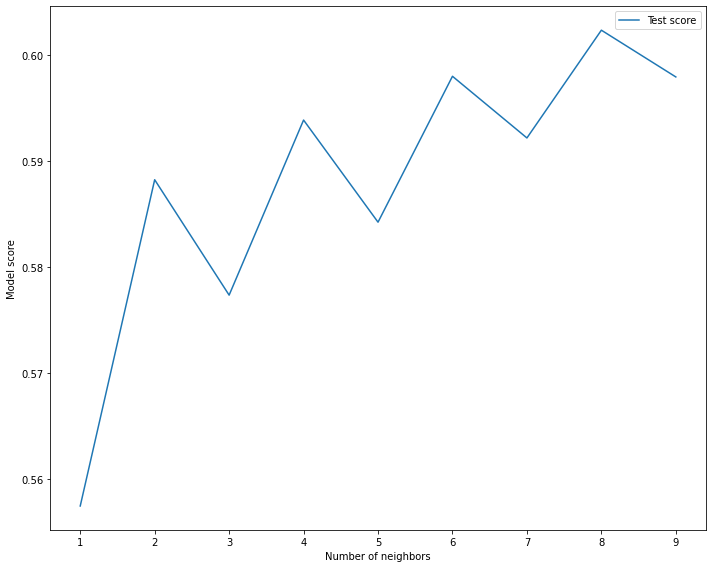

In [ ]:
X = dfs.drop(['Smoking_Smoker', 'Smoking_Non-smoker'], axis=1)
y = dfs.Smoking_Smoker

# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train,y_train)

y_pred1 = knn.predict(X_test)

print("k value is taken to be k=3 for a trial before the hyperparameter optimization. Trial accuracy score:",accuracy_score(y_test,y_pred1))

####################### HYPERPARAMETER TUNING #######################

test_score = []
neighbors = range(1, 10)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))


plt.figure(figsize=(10, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 10, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

knn = KNeighborsClassifier(n_neighbors = 8)  #k=8 is our highest accuracy value!!
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
print("Result of k=8 is the highest accuracy value as can be seen in the graph. Accuracy score:" , accuracy_score(y_test,y_pred1))

## Stroke
As said, this value will be treated by the kNN algorithm. 
- Trial k value is taken to be k=3
- Trial accuracy score: 0.9583 (roughly) (visible in the output)

For the hyperparameter tuning part, k is plotted in the model with respect to the accuracy scores it gives with a range of 1 to 10. From the generated model, the k value that gives the highest accuracy score is observed to be k=8. 
- Highest accuracy score: 0.9620 (roughly) (visible in the output)

(The model range is kept small for the additional dataset, since the code cells were taking too long to be executed, between 20-28 minutes)

For this variable only, a renaming process is performed on the column names "Stroke_Had stroke" and "Stroke_No stroke" to initialize 'y' successfully. The blank spaces in these column names were creating a problem.

k value is taken to be k=3 for a trial before the hyperparameter optimization. Trial accuracy score: 0.9583163951343069
Result of k=8 is the highest accuracy value as can be seen in the graph. Accuracy score: 0.9620375871665781


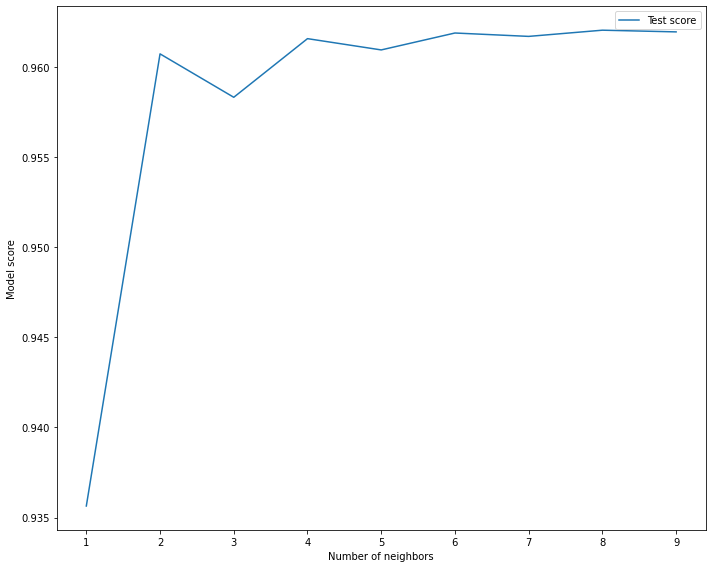

In [ ]:
dfs.rename(columns = {'Stroke_Had stroke':'Stroke_Had_stroke', 'Stroke_No stroke':'Stroke_No_stroke'}, inplace = True)

X = dfs.drop(['Stroke_Had_stroke', 'Stroke_No_stroke'], axis=1)
y = dfs.Stroke_Had_stroke

# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train,y_train)

y_pred1 = knn.predict(X_test)

print("k value is taken to be k=3 for a trial before the hyperparameter optimization. Trial accuracy score:",accuracy_score(y_test,y_pred1))

####################### HYPERPARAMETER TUNING #######################

test_score = []
neighbors = range(1, 10)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))


plt.figure(figsize=(10, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 10, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

knn = KNeighborsClassifier(n_neighbors = 8)  #k=8 is our highest accuracy value!!
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
print("Result of k=8 is the highest accuracy value as can be seen in the graph. Accuracy score:" , accuracy_score(y_test,y_pred1))

## Race
As said, this value will be treated by the kNN algorithm. 
- Trial k value is taken to be k=1
- Trial accuracy score: 0.9522 (roughly) (visible in the output)

For the hyperparameter tuning part, k is plotted in the model with respect to the accuracy scores it gives with a range of 1 to 10. From the generated model, the k value that gives the highest accuracy score is observed to be k=6. 
- Highest accuracy score: 0.9742 (roughly) (visible in the output)

(The model range is kept small for the additional dataset, since the code cells were taking too long to be executed, between 20-28 minutes)

k value is taken to be k=1 for a trial before the hyperparameter optimization. Trial accuracy score: 0.9521873729635073
Result of k=6 is the highest accuracy value as can be seen in the graph. Accuracy score: 0.9741705494230589


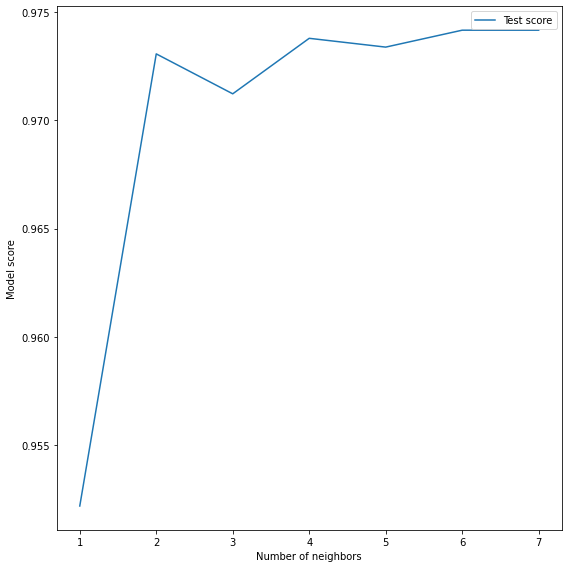

In [ ]:
X = dfs.drop(['Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White'], axis=1)
y = dfs.Race_Asian

# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)
knn = KNeighborsClassifier(n_neighbors = 1)
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train,y_train)

y_pred1 = knn.predict(X_test)

print("k value is taken to be k=1 for a trial before the hyperparameter optimization. Trial accuracy score:",accuracy_score(y_test,y_pred1))

####################### HYPERPARAMETER TUNING #######################

test_score = []
neighbors = range(1, 8)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))


plt.figure(figsize=(8, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 8, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

knn = KNeighborsClassifier(n_neighbors = 6)  #k=6 is our highest accuracy value!!
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
print("Result of k=6 is the highest accuracy value as can be seen in the graph. Accuracy score:" , accuracy_score(y_test,y_pred1))

# BMI
As said, this value will once again be treated by the Multiple Linear Regression algorithm.

The R2 Score result is ~0.0724 (full result available in the output part at the end)

Dropping rows in the dataframe containing 'nan' in order for the linear regression algorithm to work

In [ ]:
dfNew=dfNew.dropna(axis=0)

Replacing categorical variables with 0, 1, 2, 3,... etc for ML purposes

In [ ]:
dfNew['AHD'].replace(['Healthy', 'Sick'], [0, 1], inplace=True)
dfNew['Smoking'].replace(['Smoker','Non-smoker'], [0, 1], inplace=True)
dfNew['Alcohol Drinking'].replace(['Non-drinker','Drinker'], [0, 1], inplace=True)
dfNew['Stroke'].replace(['No stroke', 'Had stroke'], [0, 1], inplace=True)
dfNew['Walking Difficulties'].replace(['No difficulty walking', 'Has difficulty walking'], [0, 1], inplace=True)
dfNew['Sex'].replace(['Female', 'Male'], [0, 1], inplace=True)
dfNew['Race'].replace(['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other',
 'Hispanic'], [0, 1, 2, 3, 4, 5], inplace=True)
dfNew['Diabetes'].replace(['Diabetic', 'Healthy', 'No, borderline diabetes', 'Yes (during pregnancy)'], [0, 1, 2, 3], inplace=True)
dfNew['Physical Activity'].replace(['Physically active', 'Not physically active'], [0, 1], inplace=True)
dfNew['General Health'].replace(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], [0, 1, 2, 3, 4], inplace=True)
dfNew['Asthma'].replace(['Asthmatic', 'Healthy'], [0, 1], inplace=True)
dfNew['Kidney Disease'].replace(['Healthy', 'Has kidney disease(s)'], [0, 1], inplace=True)
dfNew['Skin Cancer'].replace(['Has skin cancer', 'Healthy'], [0, 1], inplace=True)

Creating a list of variables that excludes our target variabe for ML analysis

In [ ]:
list1 = []

for col in dfNew.columns:
  list1.append(col)

list1.remove("BMI")

print(list1)


['AHD', 'Smoking', 'Alcohol Drinking', 'Stroke', 'Physical Health', 'Mental Health', 'Walking Difficulties', 'Sex', 'Race', 'Diabetes', 'Physical Activity', 'General Health', 'Sleep Time', 'Asthma', 'Kidney Disease', 'Skin Cancer']


Converting the data to column vector format for ML

In [ ]:
X = dfNew[list1].values  
y = dfNew['BMI'].values

Splitting the data between Train and Test partitions in a 80-20 split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Setting the model to be Linear Regression

In [ ]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

Inspecting the coefficients to gather information about the data

In [ ]:
coeff_df = pd.DataFrame(model.coef_, list1, columns=['Coefficient']) 
print("Taking a look at the coefficients:")
print(" ")
print("coeff_df:")
print(" ")
print(coeff_df)
print(" ")
print("model.intercept_:")
print(" ")
print(model.intercept_)
print(" ")
print("model.coef_:")
print(" ")
print(model.coef_)
print(" ")

Taking a look at the coefficients:
 
coeff_df:
 
                      Coefficient
AHD                      0.022979
Smoking                  0.179792
Alcohol Drinking        -0.705036
Stroke                  -0.721157
Physical Health          0.007693
Mental Health            0.017908
Walking Difficulties     2.393392
Sex                      0.578867
Race                     0.076993
Diabetes                -1.633142
Physical Activity        1.499123
General Health          -0.311083
Sleep Time              -0.173134
Asthma                  -1.267543
Kidney Disease           0.328888
Skin Cancer              0.950770
 
model.intercept_:
 
30.636523867918914
 
model.coef_:
 
[ 0.02297935  0.17979168 -0.70503629 -0.72115734  0.00769314  0.01790791
  2.39339178  0.57886682  0.07699325 -1.63314202  1.49912271 -0.31108273
 -0.17313409 -1.26754305  0.32888789  0.95077002]
 


Checking for model accuracy with Mean Square Error, Mean Absolute Error and Root Mean Square Error

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Checking Model Accuracy:")
print(" ")
print("Mean Square Error:")
print(" ")
print("mse: {}".format(mse))
print(" ")
print("Mean Absolute Error:")
print(" ")
print("mae: {}".format(mae))
print(" ")
print("Root Mean Square Error:")
print(" ")
print("rmse: {}".format(rmse))
print(" ")


Checking Model Accuracy:
 
Mean Square Error:
 
mse: 37.24896727977363
 
Mean Absolute Error:
 
mae: 4.583989544615677
 
Root Mean Square Error:
 
rmse: 6.103193203543014
 


Checking for model accuracy with R2 Score

In [ ]:
def r2(y_true, y_pred):
  u = sum((y_true - y_pred)**2)
  v = sum((y_true - y_true.mean())**2)

  return 1-(u/v)
print("R2 Score Result:")
print(" ")
r2(y_test, y_pred)

R2 Score Result:
 


0.07246580878462072

# Results of Machine Learning (for categorical variables)
- Additional dataset's accuracy results (except smoking) were extremely high (more than 0.95) than the original dataset's. It can be concluded from this evaluation that higher numbers of data gives more reliable results. 
(If the range for the smoking variable was wider, a higher accuracy result could have been seen. However, in this experiment, due to the code executions' long duration, it was not possible to observe it.)

# Results of Machine Learning (for continuous variables)
- The accuracy of the Multiple Linear Regression models were lower than expected in comparison with the KNN models for the categorical variables, which implies that other machine learning techniques could be used for more accurate results in the future. The best result was achieved with the model with Age as the target variable, which got an R2 score of 0.24, while the scores were lower for RestBP and nearly equally low for the additional dataset. 